# The Role of Sentiment in the Emergence and Collapse of Bitcoin Price Bubbles

### Librerie

In [ ]:
!pip install ccxt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 641.1/641.1 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
!pip install pyleoclim

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 91.8 MB/s eta 0:00:00
   ━━━━

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np
import ccxt
from datetime import datetime, timedelta
import time

In [ ]:
import pyleoclim as pyleo

## Carico csv BTC

In [ ]:
# prompt: import btc_data.csv

btc_data = pd.read_csv('btc_data2012.csv')

# Ensure your 'Date' column is datetime and sorted
btc_data = btc_data.sort_values('Date')
btc_data['Date'] = pd.to_datetime(btc_data['Date'])

In [ ]:
btc_data.head()
btc_data.tail()

,Unnamed: 0,Date,Close
4994,4994,2025-09-03,111759.0
4995,4995,2025-09-04,110747.0
4996,4996,2025-09-05,110669.0
4997,4997,2025-09-06,110223.0
4998,4998,2025-09-07,111090.0


In [ ]:
# Create a new dataframe from btc_data containing data after February 2018
start_date = '2018-08-01'
btc_data_after_feb2018 = btc_data[btc_data['Date'] >= start_date].copy()

# Display the head of the new dataframe to verify the subsetting
#print(btc_data_after_feb2018.head())

btc_data = btc_data_after_feb2018

In [ ]:
btc_data.tail()

,Unnamed: 0,Date,Close
4994,4994,2025-09-03,111759.0
4995,4995,2025-09-04,110747.0
4996,4996,2025-09-05,110669.0
4997,4997,2025-09-06,110223.0
4998,4998,2025-09-07,111090.0


In [ ]:
btc_data.head()

,Unnamed: 0,Date,Close
2404,2404,2018-08-01,7602.01
2405,2405,2018-08-02,7536.37
2406,2406,2018-08-03,7416.98
2407,2407,2018-08-04,7009.99
2408,2408,2018-08-05,7032.61


## Fear and Greed index upload

In [ ]:
fng_data = pd.read_csv('fng_dataX.csv')

In [ ]:
fng_data.head()

,fear_greed_index,value_classification,Date,time_until_update
0,44,Fear,2025-09-07,NaN
1,48,Neutral,2025-09-06,NaN
2,48,Neutral,2025-09-05,NaN
3,51,Neutral,2025-09-04,NaN
4,55,Greed,2025-09-03,NaN


In [ ]:
fng_data.tail()

,fear_greed_index,value_classification,Date,time_until_update
2588,25,Extreme Fear,2018-08-06,NaN
2589,23,Extreme Fear,2018-08-05,NaN
2590,31,Fear,2018-08-04,NaN
2591,36,Fear,2018-08-03,NaN
2592,39,Fear,2018-08-02,NaN


# Ex-post Bubbles Identification

## Peak detection

### Revision con modifica su cluster aggregation

In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
from tqdm import tqdm

# ======================
# PARAMETERS
# ======================
epsilon0_values = np.arange(0.1, 5.1, 0.1)   # ε₀ grid: 0.1–5.0
window_values = np.arange(10, 65, 5)         # rolling window: 10–60 days
post_peak_window = 50                        # days to check after peak
rel_increase_threshold = 0.02                # ≥ 2% post-peak rise to accept
eps_post_multiplier = 1.0                    # same volatility scaling
cluster_tolerance_days = 45                  # merge peaks within 60 days

# ======================
# PREPARE DATA
# ======================
btc_data = btc_data.sort_values('Date').copy()
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data['log_close'] = np.log(btc_data['Close'])
btc_data['log_return'] = btc_data['log_close'].diff()

# ======================
# GRID SEARCH ε-DRAWWUP + POST-PEAK TOLERANCE
# ======================
peak_counts = defaultdict(int)
effective_runs = 0  # number of (ε₀,w) combinations producing at least one peak

for epsilon0 in tqdm(epsilon0_values, desc="ε₀ Loop"):
    for w in window_values:
        df = btc_data.copy()
        df['volatility'] = df['log_close'].rolling(window=w).std()
        df['epsilon'] = epsilon0 * df['volatility']

        drawup_peaks = []
        i, n = 1, len(df)

        while i < n:
            ret = df.iloc[i]['log_return']
            eps = df.iloc[i]['epsilon']
            if np.isnan(ret) or np.isnan(eps):
                i += 1
                continue

            phase = 'drawup' if ret > 0 else 'drawdown'
            i0 = i
            p_i0_i = 0.0
            cum_returns = [0.0]
            indices = [i0]
            stop = False

            while i + 1 < n and not stop:
                i += 1
                ret = df.iloc[i]['log_return']
                eps = df.iloc[i]['epsilon']
                if np.isnan(ret) or np.isnan(eps):
                    continue

                p_i0_i += ret
                cum_returns.append(p_i0_i)
                indices.append(i)

                if phase == 'drawup':
                    delta = max(cum_returns) - p_i0_i
                else:
                    delta = p_i0_i - min(cum_returns)

                if delta > eps:
                    stop = True

            # --- detect drawup peak ---
            if phase == 'drawup':
                peak_idx = indices[np.argmax(cum_returns)]
                peak_date = df.iloc[peak_idx]['Date']
                peak_price = df.iloc[peak_idx]['Close']

                # --- Option B: post-peak bounce check ---
                window_end = min(peak_idx + post_peak_window, n)
                post_window = df.iloc[peak_idx+1:window_end]

                if not post_window.empty:
                    local_max_idx = post_window['Close'].idxmax()
                    local_max_price = df.loc[local_max_idx, 'Close']
                    growth = (local_max_price / peak_price) - 1
                    eps_post = epsilon0 * df.loc[local_max_idx, 'volatility'] * eps_post_multiplier

                    # accept later peak only if bounce satisfies threshold
                    if (growth >= rel_increase_threshold) or \
                       ((local_max_price - peak_price) >= eps_post):
                        peak_date = df.loc[local_max_idx, 'Date']

                drawup_peaks.append(peak_date)

            i = indices[-1] + 1

        # --- update counts and effective runs ---
        if drawup_peaks:
            effective_runs += 1
            for peak_date in drawup_peaks:
                peak_counts[peak_date] += 1

# ======================
# NORMALIZE BY TOTAL DETECTED PEAKS
# ======================
total_detected_peaks = sum(peak_counts.values())
if total_detected_peaks == 0:
    raise ValueError("No peaks detected; check parameters or data range.")

peak_frequencies = {
    date: count / total_detected_peaks for date, count in peak_counts.items()
}

peak_df = (
    pd.DataFrame({'Date': list(peak_frequencies.keys()),
                  'ft': list(peak_frequencies.values())})
    .sort_values('Date')
    .reset_index(drop=True)
)

# ======================
# CLUSTER AGGREGATION (select highest price in cluster)
# ======================
merged_peaks = []
if not peak_df.empty:
    current_cluster = [peak_df.iloc[0]]

    for _, row in peak_df.iloc[1:].iterrows():
        prev_date = current_cluster[-1]['Date']
        if (row['Date'] - prev_date).days <= cluster_tolerance_days:
            current_cluster.append(row)
        else:
            cluster_df = pd.DataFrame(current_cluster)
            # merge with btc_data to access prices
            cluster_df = cluster_df.merge(btc_data[['Date', 'Close']], on='Date', how='left')
            cluster_peak = cluster_df.loc[cluster_df['Close'].idxmax()]  # choose highest price
            merged_peaks.append(cluster_peak)
            current_cluster = [row]

    # finalize last cluster
    cluster_df = pd.DataFrame(current_cluster)
    cluster_df = cluster_df.merge(btc_data[['Date', 'Close']], on='Date', how='left')
    cluster_peak = cluster_df.loc[cluster_df['Close'].idxmax()]
    merged_peaks.append(cluster_peak)

merged_df = pd.DataFrame(merged_peaks).reset_index(drop=True)

# ======================
# CLASSIFY PEAKS (relative scale)
# ======================
max_ft = merged_df['ft'].max()
merged_df['ft_norm'] = merged_df['ft'] / max_ft

def classify_peak(ft_norm):
    if ft_norm >= 0.68:
        return 'Long Bubble'
    elif ft_norm >= 0.50:
        return 'Short Bubble'
    else:
        return 'No Bubble'

merged_df['Bubble Type'] = merged_df['ft_norm'].apply(classify_peak)

# ======================
# OUTPUT
# ======================
print(f"\nEffective runs with ≥1 peak: {effective_runs}")
print(f"Total detected peaks: {total_detected_peaks}\n")
print(merged_df[['Date', 'Close', 'ft', 'ft_norm', 'Bubble Type']])

# Optional: export all detected peaks if you want to inspect them
# peak_df.to_csv("all_detected_peaks.csv", index=False)

ε₀ Loop: 100%|██████████| 50/50 [04:07<00:00,  4.95s/it]


Effective runs with ≥1 peak: 550
Total detected peaks: 40596

         Date      Close        ft   ft_norm   Bubble Type
0  2018-09-04    7361.00  0.007562  0.261499     No Bubble
1  2019-02-23    4113.53  0.010247  0.354344     No Bubble
2  2019-06-26   12920.54  0.023401  0.809199   Long Bubble
3  2020-02-14   10364.04  0.023426  0.810051   Long Bubble
4  2020-06-01   10203.64  0.025594  0.885009   Long Bubble
5  2020-08-17   12298.38  0.019288  0.666951  Short Bubble
6  2021-04-13   63564.48  0.028919  1.000000   Long Bubble
7  2021-11-08   67559.00  0.021209  0.733390   Long Bubble
8  2022-08-13   24456.00  0.019682  0.680579   Long Bubble
9  2023-04-14   30498.00  0.020371  0.704429   Long Bubble
10 2023-07-13   31471.00  0.021037  0.727428   Long Bubble
11 2024-03-13   73121.00  0.019780  0.683986   Long Bubble
12 2024-07-28   68264.00  0.019362  0.669506  Short Bubble
13 2024-12-17  106187.00  0.023697  0.819421   Long Bubble
14 2025-05-22  111743.00  0.007513  0.259796     No 

In [ ]:
peak_df = merged_df

## Plots of bubbles peaks

### Long Bubbles

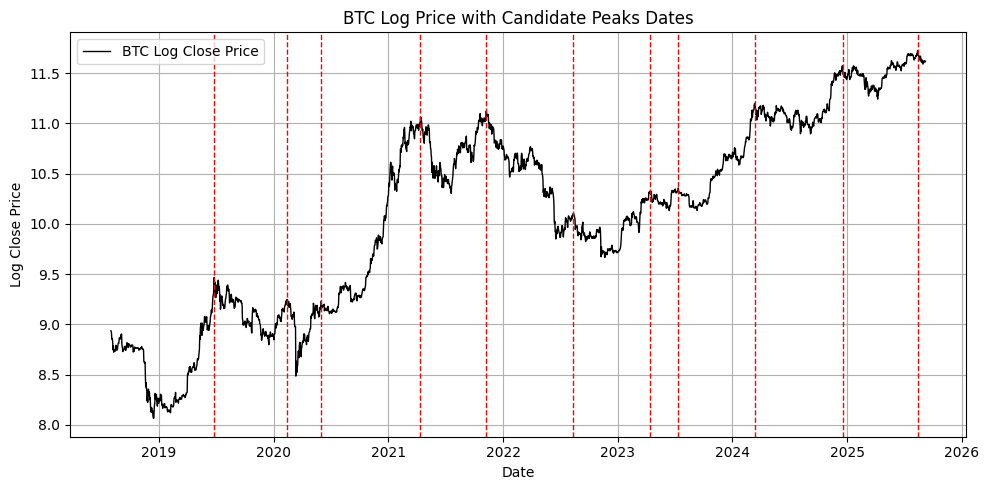

In [ ]:
# Filter peak_df for Long Bubbles
long_bubbles = peak_df[peak_df['Bubble Type'] == 'Long Bubble']

# Plot the log price chart
plt.figure(figsize=(10, 5))
plt.plot(btc_data['Date'], btc_data['log_close'], label='BTC Log Close Price', color='black', linewidth=1)

# Add vertical lines for Long Bubble dates
for date in long_bubbles['Date']:
    plt.axvline(date, color='red', linestyle='--', linewidth=1)

# Aesthetics
plt.title('BTC Log Price with Candidate Peaks Dates')
plt.xlabel('Date')
plt.ylabel('Log Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Short

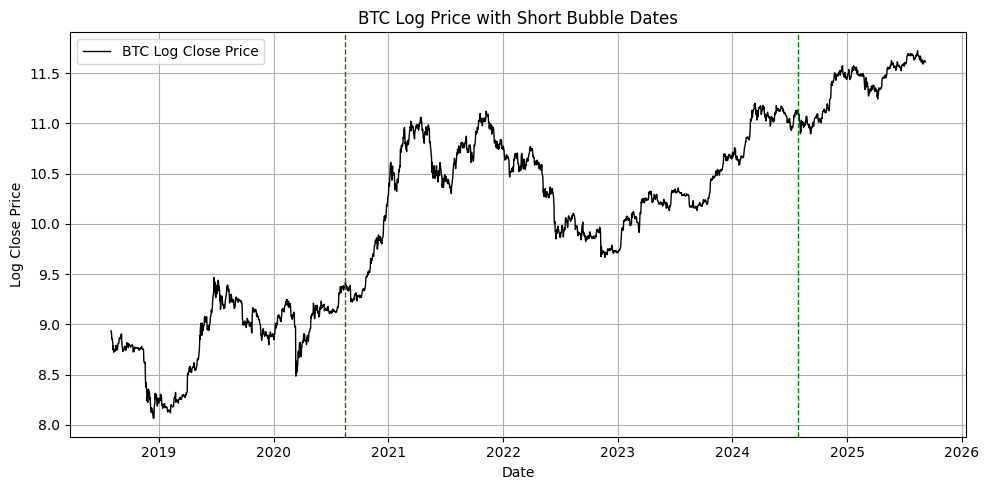

In [ ]:
# Filter peak_df for Short Bubbles
short_bubbles = peak_df[peak_df['Bubble Type'] == 'Short Bubble']

# Plot the log price chart
plt.figure(figsize=(10,5))
plt.plot(btc_data['Date'], btc_data['log_close'], label='BTC Log Close Price', color='black', linewidth=1)

# Add vertical lines for Short Bubble dates
for date in short_bubbles['Date']:
    plt.axvline(date, color='green', linestyle='--', linewidth=1)

# Aesthetics
plt.title('BTC Log Price with Short Bubble Dates')
plt.xlabel('Date')
plt.ylabel('Log Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
peaks = peak_df.sort_values(by='ft', ascending=False).head(500)
display(peaks)

,Date,ft,Bubble Type
84,2019-06-26,0.996364,Long Bubble
192,2021-04-13,0.990909,Long Bubble
362,2024-03-13,0.983636,Long Bubble
403,2024-12-17,0.981818,Long Bubble
247,2022-03-29,0.961818,Long Bubble
...,...,...,...
132,2020-05-02,0.014545,No Bubble
343,2023-11-29,0.014545,No Bubble
2,2018-03-15,0.012727,No Bubble
554,2024-06-09,0.012727,No Bubble


In [ ]:
peaks.to_csv('BTCpeaks.csv')

## Identification of beginning times of the bubbles

### Versione 2

In [ ]:
"""
LPPLS calibration + Lagrange regularization
Rewritten to fix the logic bug: now the window-level grid search returns *all* candidate fits
for the window (not just the single best-MSE fit). Table-4 filters are applied in the outer
loop so that a window is not discarded merely because its global best fit fails the filters.

This file otherwise preserves the original algorithm, grids, filters and Lagrange step,
with a small modification: the estimated Lagrange multiplier lambda is scaled by
`lagrange_scale` (default 0.5) to reduce penalization of short bubbles.
"""
from __future__ import annotations
import math
from dataclasses import dataclass
from typing import List, Optional, Tuple

import numpy as np
import pandas as pd
from tqdm import tqdm


# -------------------------
# Utilities
# -------------------------
def _as_day_number(dates: pd.Series) -> np.ndarray:
    # Accept Series or DatetimeIndex; return float days since epoch.
    arr = pd.to_datetime(dates).values.astype("datetime64[ns]")
    return (arr.view("int64") / 1e9 / 86400.0).astype(float)


def _rmse_from_resid(resid: np.ndarray) -> float:
    return float(np.sqrt(np.mean(resid ** 2)))


# -------------------------
# Data container
# -------------------------
@dataclass
class LPPLSFit:
    t1: pd.Timestamp
    t2: pd.Timestamp
    tc: float               # day-number (float)
    m: float
    w: float
    A: float
    B: float
    C1: float
    C2: float
    SSE: float
    mse: float
    n_obs: int


# -------------------------
# Design matrix (corrected)
# -------------------------
def _design_lppls_correct(t: np.ndarray, tc: float, m: float, w: float) -> Optional[np.ndarray]:
    """
    Correct LPPLS design matrix:
      columns = [1,
                 (tc-t)^m,
                 (tc-t)^m * cos(w * ln(tc - t)),
                 (tc-t)^m * sin(w * ln(tc - t))]
    """
    tau = tc - t
    if np.any(tau <= 0):
        return None
    ln_tau = np.log(tau)
    tau_m = np.power(tau, m)
    col0 = np.ones_like(tau_m, dtype=float)
    col1 = tau_m
    col2 = tau_m * np.cos(w * ln_tau)
    col3 = tau_m * np.sin(w * ln_tau)
    return np.column_stack([col0, col1, col2, col3])


# -------------------------
# OLS solve (returns beta or None)
# -------------------------
def _ols_solve(X: np.ndarray, y: np.ndarray) -> Optional[np.ndarray]:
    try:
        beta, *_ = np.linalg.lstsq(X, y, rcond=None)
        return beta
    except Exception:
        return None


# -------------------------
# Filters (Table 4)
# -------------------------
def _apply_filters(
    fit: LPPLSFit,
    t1_daynum: float,
    t2_daynum: float,
    require_omega_bounds: Tuple[float, float] = (4.0, 25.0),
    min_damping: float = 0.5,
    min_oscillations: float = 2.5,
    c_over_b_threshold: float = 0.05,
) -> bool:
    """
    Return True if fit passes all Table 4 filters.
    """
    # Unpack
    m = fit.m
    w = fit.w
    B = fit.B
    C1 = fit.C1
    C2 = fit.C2
    Cmag = math.hypot(C1, C2)
    n = fit.n_obs

    # B must be negative
    if not (B < 0):
        return False

    # m in (0,1)
    if not (0.0 < m < 1.0):
        return False

    # omega bounds (inclusive as in table)
    omega_min, omega_max = require_omega_bounds
    if not (omega_min <= w <= omega_max):
        return False

    # tc must be after t2 and not farther than the window length (use trading-day count n)
    tc = fit.tc
    # we compare using day-numbers: tc - t2 > 0 and <= n (approx trading-day bound)
    if not ( (tc - t2_daynum) > 0 and (tc - t2_daynum) <= float(n) ):
        return False

    # Damping D = m*|B| / (omega * |C|) >= 0.5
    if Cmag == 0:
        return False
    D = (m * abs(B)) / (w * Cmag)
    if D < min_damping:
        return False

    # Oscillation count O = (omega / 2pi) * ln( (tc - t1) / (tc - t2) )
    # Apply O filter only when |C/B| >= c_over_b_threshold
    if abs(Cmag / B) >= c_over_b_threshold:
        ratio = (tc - t1_daynum) / (tc - t2_daynum)
        # ratio must be >1 to have positive log
        if ratio <= 1.0:
            return False
        O = (w / (2.0 * math.pi)) * math.log(ratio)
        if O < min_oscillations:
            return False

    return True


# -------------------------
# Single-window grid search (returns ALL candidate fits)
# -------------------------
def lppls_gridsearch_window_correct(
    dates: pd.Series,
    log_price: pd.Series,
    t1_idx: int,
    t2_idx: int,
    m_grid: np.ndarray,
    omega_grid: np.ndarray,
    tc_offset_grid: np.ndarray,
) -> List[LPPLSFit]:
    """
    For a single window [t1_idx, t2_idx] (inclusive), scan (tc, m, w) and return *all fits*
    found across the scanned non-linear parameters for the given window.

    The caller is responsible for applying Table-4 filters to each fit.
    """
    t = _as_day_number(dates.values)          # float days
    y = log_price.values.astype(float)

    t_window = t[t1_idx : t2_idx + 1]
    y_window = y[t1_idx : t2_idx + 1]
    n_obs = len(t_window)
    if n_obs < 30:
        return []

    fits: List[LPPLSFit] = []

    for m in m_grid:
        if not (0.0 < m < 1.0):
            continue
        for w in omega_grid:
            # enforce ω bounds in the scanning itself (paper uses [4,25])
            if not (4.0 <= w <= 25.0):
                continue
            for off in tc_offset_grid:
                # off measured in trading days (1..n_obs)
                if off <= 0.0 or off > float(n_obs):
                    continue
                tc = t[t2_idx] + float(off)  # critical time as day-number
                X = _design_lppls_correct(t_window, tc, m, w)
                if X is None:
                    continue
                beta = _ols_solve(X, y_window)
                if beta is None:
                    continue
                y_hat = X @ beta
                resid = y_window - y_hat
                SSE = float(np.sum(resid ** 2))
                mse = SSE / float(n_obs)
                # gather linear params
                A = float(beta[0]); B = float(beta[1]); C1 = float(beta[2]); C2 = float(beta[3])
                # Basic numerics: require finite and not crazy
                if not np.isfinite(A + B + C1 + C2):
                    continue
                # Construct fit object
                fit = LPPLSFit(
                    t1=pd.to_datetime(dates.iloc[t1_idx]),
                    t2=pd.to_datetime(dates.iloc[t2_idx]),
                    tc=tc,
                    m=m,
                    w=w,
                    A=A, B=B, C1=C1, C2=C2,
                    SSE=SSE, mse=mse, n_obs=n_obs
                )
                if np.isfinite(mse):
                    fits.append(fit)

    return fits


# -------------------------
# Lagrange regularization (use X2 = SSE/N)
# -------------------------
def choose_bubble_start_with_lagrange_correct(
    fits: List[LPPLSFit],
    lagrange_scale: float = 1.25
) -> Optional[Tuple[LPPLSFit, pd.DataFrame]]:
    """
    Given a list of LPPLSFit objects (same t2, different t1 windows), compute:
      X2 = SSE / N  (for each fit),
    regress X2 on dt (window length, here use N),
    compute X2_adj = X2 - (lambda_scaled) * N,
    pick t1* = argmin_t1 min_{fits with that t1} X2_adj
    Return the selected best fit (the one for t1* with minimal mse) and the table used.

    NEW: `lagrange_scale` multiplies the estimated lambda to reduce (or increase) penalization.
    Typical usage to reduce penalization: lagrange_scale in (0,1) (default 0.5).
    """
    if not fits:
        return None

    table = pd.DataFrame({
        "t1": [f.t1 for f in fits],
        "t2": [f.t2 for f in fits],
        "N": [f.n_obs for f in fits],
        "X2": [f.mse for f in fits],
    }).sort_values("t1").reset_index(drop=True)

    # regress X2 ~ alpha + lambda * N
    Xmat = np.column_stack([np.ones(len(table)), table["N"].values.astype(float)])
    y = table["X2"].values.astype(float)
    coef, *_ = np.linalg.lstsq(Xmat, y, rcond=None)
    alpha, lamb = coef

    # scale the estimated lambda to reduce/increase penalization
    lamb_scaled = float(lamb) * float(lagrange_scale)

    # compute adjusted X2 using scaled lambda
    table["X2_adj"] = table["X2"] - lamb_scaled * table["N"]

    # choose the t1* as the row with minimal adjusted X2
    idx = int(table["X2_adj"].values.argmin())
    t1_star = table.iloc[idx]["t1"]

    # pick the best fit among those with t1 == t1_star (choose minimal mse)
    candidate_fits = [f for f in fits if f.t1 == t1_star]
    if not candidate_fits:
        return None
    best_fit = min(candidate_fits, key=lambda f: f.mse)
    return best_fit, table


# -------------------------
# Main routine: per-peak scanning with filters
# -------------------------
def lppls_bubble_starts_for_peaks(
    price_df: pd.DataFrame,
    peak_dates: List[pd.Timestamp],
    prev_peak_dates: Optional[List[pd.Timestamp]] = None,
    m_grid: Optional[np.ndarray] = None,
    omega_grid: Optional[np.ndarray] = None,
    tc_offset_step: int = 1,
    fast_mode: bool = False,
    lagrange_scale: float = 1.25,   # <--- new parameter, default reduced penalization
) -> pd.DataFrame:
    """
    Document-conforming main routine.
    - price_df: must contain 'Date' and 'Close'
    - peak_dates: list-like of dates to analyze as t2 (can be datetimes or strings)
    - Scans t1 windows of N in [30, 720] trading-days, step 1 trading day (691 windows).
    - Returns one best fit per peak that satisfies Table 4 filters (if any).

    The Lagrange penalization strength is reduced by `lagrange_scale` applied to the
    estimated lambda from the X2 ~ alpha + lambda*N regression. Set lagrange_scale=1.0
    to preserve original behaviour, or use values <1 to reduce penalization.
    """

    df = price_df[["Date", "Close"]].copy().sort_values("Date").reset_index(drop=True)
    df["Date"] = pd.to_datetime(df["Date"])
    df["log_price"] = np.log(df["Close"])

    # default grids (document suggests ω ∈ [4,25], m ∈ (0,1))
    if fast_mode:
        m_grid = np.linspace(0.3, 0.7, 5)
        omega_grid = np.linspace(6.0, 12.0, 5)
        tc_offset_step = 5
    else:
        if m_grid is None:
            m_grid = np.linspace(0.1, 0.9, 17)
        if omega_grid is None:
            omega_grid = np.linspace(4.0, 25.0, 22)  # enforce doc bounds by default

    # prepare peak ordering and previous-peak mapping
    peaks_sorted = sorted(pd.to_datetime(peak_dates))
    if prev_peak_dates is not None and len(prev_peak_dates) == len(peaks_sorted):
        prev_map = {p: pp for p, pp in zip(peaks_sorted, pd.to_datetime(prev_peak_dates))}
    else:
        prev_map = {p: (peaks_sorted[i - 1] if i > 0 else None) for i, p in enumerate(peaks_sorted)}

    out_rows = []

    # convenience: precompute date values as day-numbers
    date_daynums = _as_day_number(df["Date"])
    date_set = set(df["Date"].values)

    for p in tqdm(peaks_sorted, desc="Processing peaks"):
        # locate nearest trading-day index for p
        if np.datetime64(p) in date_set:
            t2_idx = int(df.index[df["Date"] == p][0])
        else:
            # nearest trading day (left/right)
            pos = int(np.searchsorted(df["Date"].values, np.datetime64(p)))
            if pos >= len(df):
                t2_idx = len(df) - 1
            elif pos == 0:
                t2_idx = 0
            else:
                # choose closer of pos and pos-1
                left = df.loc[pos - 1, "Date"]
                right = df.loc[pos, "Date"]
                t2_idx = pos if abs(right - p) < abs(p - left) else pos - 1

        # snap to actual local maximum ±3 trading days
        win_lo = max(0, t2_idx - 3)
        win_hi = min(len(df) - 1, t2_idx + 3)
        window_local = df.loc[win_lo:win_hi]
        local_peak_idx = window_local["Close"].idxmax()
        t2_idx = int(local_peak_idx)
        t2_date = df.loc[t2_idx, "Date"]
        t2_daynum = date_daynums[t2_idx]

        # FIX2 #############################################################################################################
        candidates = []
        for back in range(30, 200):
            idx = t2_idx - back
            if idx >= 0:
                candidates.append(idx)
            else:
                break

        prev_peak = prev_map.get(p, None)
        min_t1 = (prev_peak + pd.Timedelta(days=1)) if prev_peak is not None else None

        fits_for_peak: List[LPPLSFit] = []

        # inner scanning (t1 windows)
        for t1_idx in tqdm(candidates, desc=f"Scanning t1 for {t2_date.date()}", leave=False):
            t1_date = df.loc[t1_idx, "Date"]
            if min_t1 is not None and t1_date < min_t1:
                continue

            n_obs = t2_idx - t1_idx + 1
            if not (30 <= n_obs <= 720):
                continue

            # build tc offset grid in trading days: 1..n_obs inclusive, with step
            tc_offset_grid = np.arange(1, n_obs + 1, tc_offset_step, dtype=float)

            # get ALL candidate fits for this window
            window_fits = lppls_gridsearch_window_correct(
                dates=df["Date"],
                log_price=df["log_price"],
                t1_idx=t1_idx,
                t2_idx=t2_idx,
                m_grid=m_grid,
                omega_grid=omega_grid,
                tc_offset_grid=tc_offset_grid,
            )

            if not window_fits:
                continue

            # apply Table 4 filters to *each* candidate fit
            t1_daynum = date_daynums[t1_idx]
            for fit in window_fits:
                if _apply_filters(fit, t1_daynum=t1_daynum, t2_daynum=t2_daynum):
                    fits_for_peak.append(fit)

        if not fits_for_peak:
            # no qualified fits for this peak
            continue

        # Lagrange regularization on X2 = mse to select t1*
        chosen_fit, lag_table = choose_bubble_start_with_lagrange_correct(fits_for_peak, lagrange_scale=lagrange_scale)
        if chosen_fit is None:
            continue

        out_rows.append({
            "peak": t2_date,
            "t1_star": chosen_fit.t1,
            "t2": chosen_fit.t2,
            "n_obs": chosen_fit.n_obs,
            "SSE": chosen_fit.SSE,
            "mse": chosen_fit.mse,
            "X2_adj": float(lag_table.loc[lag_table["t1"] == chosen_fit.t1, "X2_adj"].values[0]),
            "tc_daynum": chosen_fit.tc,
            "m": chosen_fit.m,
            "omega": chosen_fit.w,
            "A": chosen_fit.A,
            "B": chosen_fit.B,
            "C1": chosen_fit.C1,
            "C2": chosen_fit.C2,
        })

    return pd.DataFrame(out_rows).sort_values("peak").reset_index(drop=True)

### Inizio con le long bubbles

In [ ]:
# Filter peak_df for Long Bubbles
peak_df = long_bubbles

In [ ]:
peak_df.head(20)

,Date,ft,Close,ft_norm,Bubble Type
2,2019-06-26,0.023401,12920.54,0.809199,Long Bubble
3,2020-02-14,0.023426,10364.04,0.810051,Long Bubble
4,2020-06-01,0.025594,10203.64,0.885009,Long Bubble
6,2021-04-13,0.028919,63564.48,1.000000,Long Bubble
7,2021-11-08,0.021209,67559.00,0.733390,Long Bubble
8,2022-08-13,0.019682,24456.00,0.680579,Long Bubble
9,2023-04-14,0.020371,30498.00,0.704429,Long Bubble
10,2023-07-13,0.021037,31471.00,0.727428,Long Bubble
11,2024-03-13,0.019780,73121.00,0.683986,Long Bubble
13,2024-12-17,0.023697,106187.00,0.819421,Long Bubble


In [ ]:
result = lppls_bubble_starts_for_peaks(btc_data, peak_df['Date'].tolist(), fast_mode=True)
print(result)

Processing peaks: 100%|██████████| 11/11 [03:56<00:00, 21.51s/it]


         peak    t1_star         t2  n_obs       SSE       mse    X2_adj  \
0  2019-06-26 2018-12-17 2019-06-26    192  0.884184  0.004605  0.003685   
1  2020-02-14 2019-11-22 2020-02-14     85  0.073800  0.000868 -0.002048   
2  2020-06-01 2020-03-12 2020-06-01     82  0.300315  0.003662 -0.015135   
3  2021-04-13 2020-09-26 2021-04-13    200  1.410822  0.007054 -0.008983   
4  2021-11-08 2021-05-20 2021-11-08    173  0.973259  0.005626 -0.003153   
5  2022-08-13 2022-06-16 2022-08-13     59  0.064866  0.001099  0.000488   
6  2023-04-14 2022-11-08 2023-04-14    158  0.347798  0.002201 -0.003001   
7  2023-07-13 2023-04-19 2023-07-13     86  0.210930  0.002453 -0.001676   
8  2024-03-13 2023-08-27 2024-03-13    200  0.363942  0.001820 -0.000271   
9  2024-12-17 2024-06-14 2024-12-17    187  0.543388  0.002906 -0.009127   
10 2025-08-13 2025-02-25 2025-08-13    170  0.208890  0.001229 -0.001555   

    tc_daynum    m  omega          A         B        C1        C2  
0     18244.0  0.3

### Ora faccio tabella

In [ ]:
# Calculate growth percentage
# Get the price at the start and peak dates
# Make sure to use the original complete data for accurate price lookups
btc_data['Date'] = pd.to_datetime(btc_data['Date'])

def get_price_at_date(df, date):
    # Find the closest date in the dataframe
    closest_date_index = (df['Date'] - date).abs().idxmin()
    return df.loc[closest_date_index, 'Close']

result['start_price'] = result['t1_star'].apply(lambda date: get_price_at_date(btc_data, date))
result['peak_price'] = result['t2'].apply(lambda date: get_price_at_date(btc_data, date))

result['growth_percentage'] = ((result['peak_price'] - result['start_price']) / result['start_price']) * 100

# Display the table with required columns
bubble_table = result[['t1_star', 't2', 'start_price', 'peak_price', 'growth_percentage']]
bubble_table = bubble_table.rename(columns={'t1_star': 'Bubble Start Date', 't2': 'Peak Date', 'start_price': 'Start Price', 'peak_price': 'Peak Price', 'growth_percentage': 'Growth (%)'})

display(bubble_table)

NameError: name 'result' is not defined

In [ ]:
# Ensure btc_data0 is a DataFrame and convert 'Date' to datetime
if 'btc_data0' not in globals():
    # Assuming the original data is in btc_data after the initial load
    btc_data0 = btc_data.copy()

btc_data0['Date'] = pd.to_datetime(btc_data0['Date'])
bubble_table['Peak Date'] = pd.to_datetime(bubble_table['Peak Date'])
bubble_table['Bubble Start Date'] = pd.to_datetime(bubble_table['Bubble Start Date'])


# Calculate the fall percentage from the peak date to the minimum between the peak and the next bubble start date
bubble_table['Fall (%)'] = 0.0
bubble_table['Minimum Date'] = pd.NaT

for i in range(len(bubble_table)):
    peak_date = bubble_table.loc[i, 'Peak Date']
    peak_price = bubble_table.loc[i, 'Peak Price']

    if i < len(bubble_table) - 1:
        next_bubble_start_date = bubble_table.loc[i + 1, 'Bubble Start Date']
        # Find the minimum price between the peak date and the next bubble start date
        min_price_period = btc_data0[(btc_data0['Date'] > peak_date) & (btc_data0['Date'] <= next_bubble_start_date)].copy()
    else:
        # For the last bubble, find the minimum price from the peak date to the end of the dataset
        min_price_period = btc_data0[btc_data0['Date'] > peak_date].copy()

    if not min_price_period.empty:
        min_price = min_price_period['Close'].min()
        min_date = min_price_period[min_price_period['Close'] == min_price]['Date'].iloc[0]
        fall_percentage = ((peak_price - min_price) / peak_price) * 100
        bubble_table.loc[i, 'Fall (%)'] = fall_percentage
        bubble_table.loc[i, 'Minimum Date'] = min_date

# Display the updated table
display(bubble_table)

,Bubble Start Date,Peak Date,Start Price,Peak Price,Growth (%),Fall (%),Minimum Date
0,2018-12-17,2019-06-26,3496.73,12920.54,269.503508,43.610329,2019-11-22
1,2019-11-22,2020-02-14,7285.85,10364.04,42.248880,53.283951,2020-03-12
2,2020-03-12,2020-06-01,4841.67,10203.64,110.746292,11.705039,2020-06-27
3,2020-09-26,2021-04-13,10729.09,63564.48,492.449872,42.136819,2021-05-19
4,2021-05-20,2021-11-08,40640.90,67559.00,66.234015,69.829512,2022-06-16
5,2022-06-16,2022-08-13,20382.88,24456.00,19.983045,24.492967,2022-09-21
6,2022-11-08,2023-04-14,18550.00,30498.00,64.409704,5.479048,2023-04-19
7,2023-04-19,2023-07-13,28827.00,31471.00,9.171957,17.358838,2023-08-26
8,2023-08-27,2024-03-13,26090.00,73121.00,180.264469,20.329317,2024-05-01
9,2024-06-14,2024-12-17,65996.00,106187.00,60.899145,16.584893,2025-02-25


In [ ]:
# Filter the bubble_table to keep only rows where 'Growth (%)' is XX or more
bubble_table = bubble_table[bubble_table['Growth (%)'] >= 30].copy()

# Display the filtered table
display(bubble_table)

,Bubble Start Date,Peak Date,Start Price,Peak Price,Growth (%),Fall (%),Minimum Date
0,2018-12-17,2019-06-26,3496.73,12920.54,269.503508,43.610329,2019-11-22
1,2019-11-22,2020-02-14,7285.85,10364.04,42.248880,53.283951,2020-03-12
2,2020-03-12,2020-06-01,4841.67,10203.64,110.746292,11.705039,2020-06-27
3,2020-09-26,2021-04-13,10729.09,63564.48,492.449872,42.136819,2021-05-19
4,2021-05-20,2021-11-08,40640.90,67559.00,66.234015,69.829512,2022-06-16
6,2022-11-08,2023-04-14,18550.00,30498.00,64.409704,5.479048,2023-04-19
8,2023-08-27,2024-03-13,26090.00,73121.00,180.264469,20.329317,2024-05-01
9,2024-06-14,2024-12-17,65996.00,106187.00,60.899145,16.584893,2025-02-25
10,2025-02-25,2025-08-13,88576.00,123360.00,39.270231,12.233301,2025-08-31


In [ ]:
bubble_table.to_csv('bubble_tableH.csv', index=False)

In [ ]:
bubble_table['Bubble Length (days)'] = (bubble_table['Peak Date'] - bubble_table['Bubble Start Date']).dt.days
display(bubble_table)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
bubble_table = pd.read_csv('bubble_tableH.csv')

Versione finale della tabella

In [ ]:
bubble_table = bubble_table[bubble_table['Bubble Length (days)'] >= 100].copy()
display(bubble_table)

,Bubble Start Date,Peak Date,Start Price,Peak Price,Growth (%),Fall (%),Minimum Date,Bubble Length (days)
0,2018-12-17,2019-06-26,3496.73,12920.54,269.503508,43.610329,2019-11-22,191
3,2020-09-26,2021-04-13,10729.09,63564.48,492.449872,42.136819,2021-05-19,199
4,2021-05-20,2021-11-08,40640.90,67559.00,66.234015,69.829512,2022-06-16,172
5,2022-11-08,2023-04-14,18550.00,30498.00,64.409704,5.479048,2023-04-19,157
6,2023-08-27,2024-03-13,26090.00,73121.00,180.264469,20.329317,2024-05-01,199
7,2024-06-14,2024-12-17,65996.00,106187.00,60.899145,16.584893,2025-02-25,186
8,2025-02-25,2025-08-13,88576.00,123360.00,39.270231,12.233301,2025-08-31,169


### Grafici

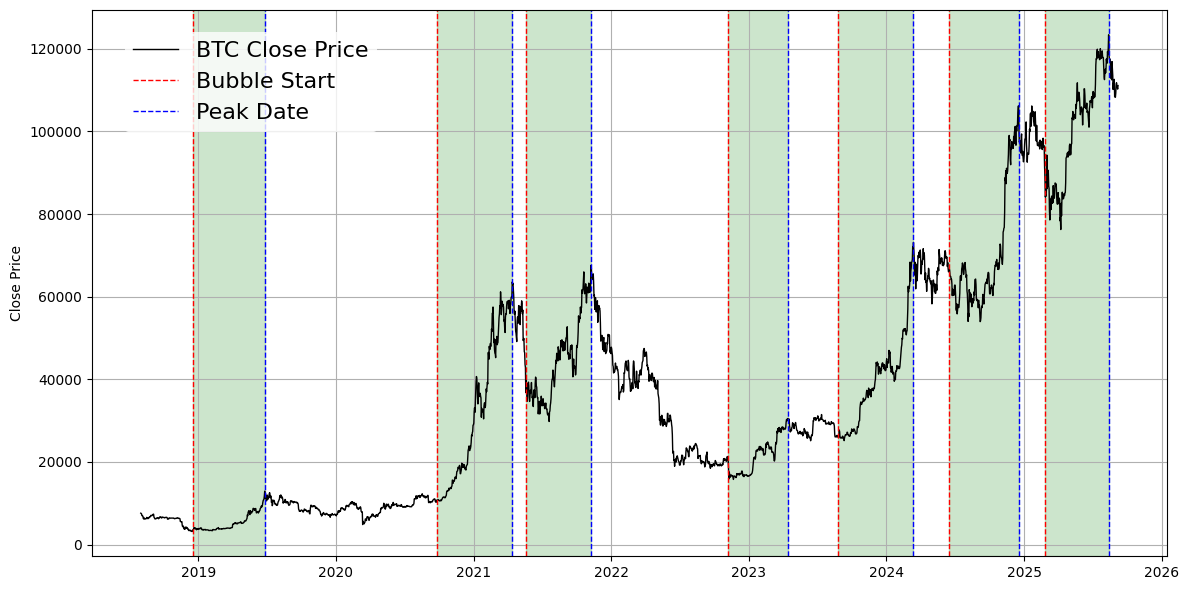

In [ ]:
# Ensure btc_data0 and bubble_table are available and have the correct date format
if 'btc_data0' not in globals():
    # Assuming the original data is in btc_data after the initial load
    btc_data0 = btc_data.copy()

btc_data0['Date'] = pd.to_datetime(btc_data0['Date'])
bubble_table['Peak Date'] = pd.to_datetime(bubble_table['Peak Date'])
bubble_table['Bubble Start Date'] = pd.to_datetime(bubble_table['Bubble Start Date'])


# Plot the close price
plt.figure(figsize=(12, 6))
plt.plot(btc_data0['Date'], btc_data0['Close'], label='BTC Close Price', color='black', linewidth=1)

#plt.rcParams.update({'font.size': 14})        # dimensione testo generale
plt.rcParams.update({'axes.labelsize': 18})   # etichette assi
plt.rcParams.update({'xtick.labelsize': 18})  # numeri asse X
plt.rcParams.update({'ytick.labelsize': 18})  # numeri asse Y
plt.rcParams.update({'legend.fontsize': 16})  # legenda
#plt.rcParams.update({'figure.figsize': (10, 5)})  # dimensione figura
#plt.legend(loc='upper left', frameon=False)


# Highlight the bubble periods with vertical lines and shading
for index, row in bubble_table.iterrows():
    # Vertical red line for Bubble Start Date
    plt.axvline(row['Bubble Start Date'], color='red', linestyle='--', linewidth=1, label='Bubble Start' if index == 0 else "")

    # Vertical blue line for Peak Date
    plt.axvline(row['Peak Date'], color='blue', linestyle='--', linewidth=1, label='Peak Date' if index == 0 else "")

    # Highlight the bubble region in green
    plt.axvspan(row['Bubble Start Date'], row['Peak Date'], color='green', alpha=0.2)

# Aesthetics
#plt.title('BTC Close Price with Identified Bubbles')
#plt.xlabel('Date')


plt.ylabel('Close Price')
#plt.legend()
plt.grid(True)


plt.legend(
    loc='upper left',          # posizione base
    bbox_to_anchor=(0.02, 0.98),  # coordinate relative (leggermente dentro)
    frameon=True,              # box visibile (puoi mettere False se vuoi toglierlo)
    facecolor='white',         # sfondo leggibile
    edgecolor='none'           # senza bordo
)

plt.tight_layout()
plt.show()

# Wavelet Analysis BTC/FGI

In [ ]:
fng_data.head()

,fear_greed_index,value_classification,Date,time_until_update
0,66,Greed,2025-07-09,NaN
1,65,Greed,2025-07-08,NaN
2,73,Greed,2025-07-07,NaN
3,66,Greed,2025-07-06,NaN
4,67,Greed,2025-07-05,NaN


In [ ]:
btc_data.head()

,Unnamed: 0,Date,Close
2251,2251,2018-03-01,10903.13
2252,2252,2018-03-02,11029.99
2253,2253,2018-03-03,11445.00
2254,2254,2018-03-04,11463.27
2255,2255,2018-03-05,11419.24


In [ ]:
btc_data.tail()

,Unnamed: 0,Date,Close
4994,4994,2025-09-03,111759.0
4995,4995,2025-09-04,110747.0
4996,4996,2025-09-05,110669.0
4997,4997,2025-09-06,110223.0
4998,4998,2025-09-07,111090.0


In [ ]:
fng_data.tail()

,fear_greed_index,value_classification,Date
2679,67,Greed,2025-07-05
2680,66,Greed,2025-07-06
2681,73,Greed,2025-07-07
2682,65,Greed,2025-07-08
2683,66,Greed,2025-07-09


## Definisco matrix2

In [ ]:
# Ensure 'Date' columns are in datetime format
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
fng_data['Date'] = pd.to_datetime(fng_data['Date']) # Corrected column name

# Merge the dataframes on the 'Date' column
matrix2 = pd.merge(btc_data[['Date', 'Close']], fng_data[['Date', 'fear_greed_index']], left_on='Date', right_on='Date', how='inner')

# Drop the redundant 'date' column from fng_data after merging
#matrix2 = matrix2.drop(columns=['Date'])

# Rename the 'Close' column to 'closing_price' for clarity
matrix2 = matrix2.rename(columns={'Close': 'closing_price'})

# Display the head of the new dataframe
display(matrix2.head())

,Date,closing_price,fear_greed_index
0,2018-08-02,7536.37,39
1,2018-08-03,7416.98,36
2,2018-08-04,7009.99,31
3,2018-08-05,7032.61,23
4,2018-08-06,6936.11,25


In [ ]:
matrix2.tail()

,Date,closing_price,fear_greed_index
2679,2025-07-05,108240.0,67
2680,2025-07-06,109233.0,66
2681,2025-07-07,108287.0,73
2682,2025-07-08,108947.0,65
2683,2025-07-09,111287.0,66


In [ ]:
# Now add the 'time' column based on the merged DataFrame's length
matrix2['time'] = range(1, len(matrix2) + 1)

Grafico corretto

Time axis values sorted in ascending order
Time axis values sorted in ascending order


Performing wavelet coherence on surrogate pairs: 100%|██████████| 40/40 [18:07<00:00, 27.19s/it]


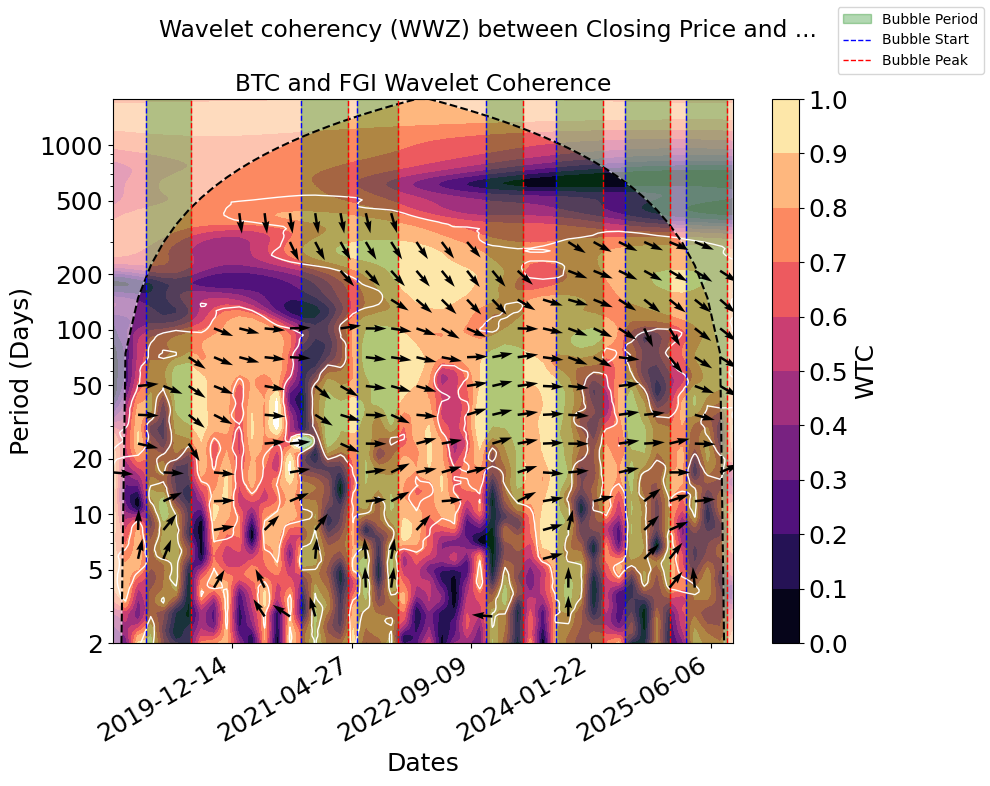

In [ ]:
import matplotlib.pyplot as plt

# Regenerate the wavelet coherence plot to ensure the figure and axes objects are current
# Redefine the time series for the full dataset
closing_price_ts = pyleo.Series(
    time=matrix2['time'],
    value=matrix2['closing_price'],
    time_name='Time',
    value_name='Closing Price',
    time_unit='unit',
    label='Closing Price'
)

fng_ts = pyleo.Series(
    time=matrix2['time'],
    value=matrix2['fear_greed_index'],
    time_name='Time',
    value_name='...',
    time_unit='unit',
    label='...'
)

btc_ts = closing_price_ts # Assign closing_price_ts to btc_ts

coh = btc_ts.wavelet_coherence(fng_ts,method='wwz')
coh_sig = coh.signif_test(method='CN',number=40) # Assuming 'coh' and 'coh_sig' are still available
fig, ax = coh_sig.plot()


# Set x-axis limits to the specified dates
# Use the full matrix2 for date to time mapping
full_matrix2 = pd.merge(btc_data[['Date', 'Close']], fng_data[['Date', 'fear_greed_index']], left_on='Date', right_on='Date', how='inner')
full_matrix2['time'] = range(1, len(full_matrix2) + 1)


start_date = pd.to_datetime('2018-03-01')
end_date = pd.to_datetime('2025-09-07') # Use the end date of the data

# Find the corresponding time values for the start and end dates
# Assuming 'time' column in full_matrix2 corresponds to the dates
start_time = full_matrix2[full_matrix2['Date'] >= start_date]['time'].min()
end_time = full_matrix2[full_matrix2['Date'] <= end_date]['time'].max()

ax.set_xlim(start_time, end_time)

# Improve x-axis tick formatting to show dates instead of time units
# Create a mapping from time to date using the full matrix2
time_to_date_map = full_matrix2.set_index('time')['Date']

# Function to format ticks
def format_time_ticks_as_dates(x, pos):
    # Find the closest date for the given time value
    closest_time = min(time_to_date_map.index, key=lambda t: abs(t - x))
    return time_to_date_map.loc[closest_time].strftime('%Y-%m-%d')

# Apply the custom formatter
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_time_ticks_as_dates))

# Improve date tick readability
fig.autofmt_xdate()

if 'bubble_table' in globals() and isinstance(bubble_table, pd.DataFrame):
    bubble_table['Bubble Start Date'] = pd.to_datetime(bubble_table['Bubble Start Date'])
    bubble_table['Peak Date'] = pd.to_datetime(bubble_table['Peak Date'])

    # Ensure full_matrix2 is available for time-date mapping
    if 'full_matrix2' in globals() and isinstance(full_matrix2, pd.DataFrame):
        full_matrix2['Date'] = pd.to_datetime(full_matrix2['Date'])
        time_to_date_map = full_matrix2.set_index('time')['Date']
        date_to_time_map = full_matrix2.set_index('Date')['time']

        for index, row in bubble_table.iterrows():
            bubble_start_date = row['Bubble Start Date']
            peak_date = row['Peak Date']

            # Find the corresponding time values for the start and peak dates
            # Use the date_to_time_map for more accurate lookup
            if bubble_start_date in date_to_time_map.index and peak_date in date_to_time_map.index:
                start_bubble_time = date_to_time_map.loc[bubble_start_date]
                end_bubble_time = date_to_time_map.loc[peak_date]

                # Add shaded region to the axes object from the previous plot
                ax.axvspan(start_bubble_time, end_bubble_time, color='green', alpha=0.3, label='Bubble Period' if index == 0 else "")

                # Add vertical lines at the start and end of the bubble
                ax.axvline(start_bubble_time, color='blue', linestyle='--', linewidth=1, label='Bubble Start' if index == 0 else "")
                ax.axvline(end_bubble_time, color='red', linestyle='--', linewidth=1, label='Bubble Peak' if index == 0 else "")

            else:
                print(f"Warning: Dates for bubble {index} not found in full_matrix2.")

        # Add a legend to the figure
        handles, labels = ax.get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper right')

        # Display the plot again to show the added highlights
#        plt.show()
    else:
        print("Error: 'full_matrix2' DataFrame not found. Cannot highlight bubbles.")
else:
    print("Error: 'bubble_table' DataFrame not found. Cannot highlight bubbles.")

plt.rcParams.update({'axes.labelsize': 16})   # etichette assi
plt.rcParams.update({'xtick.labelsize': 16})  # numeri asse X
plt.rcParams.update({'ytick.labelsize': 16})  # numeri asse Y
plt.rcParams.update({'legend.fontsize': 10})  # legenda

# Set the title and y-axis label
ax.set_title('BTC and FGI Wavelet Coherence')
ax.set_ylabel('Period (Days)')
ax.set_xlabel('Dates')

plt.show()

In [ ]:
full_matrix2.tail()

,Date,Close,fear_greed_index,time
2588,2025-09-03,111759.0,55,2589
2589,2025-09-04,110747.0,51,2590
2590,2025-09-05,110669.0,48,2591
2591,2025-09-06,110223.0,48,2592
2592,2025-09-07,111090.0,44,2593


voglio capire bene come influisce ordine di inserimento nella cross wavelet

# Singole bolle FGI

In [ ]:
matrix0 = matrix2

ridefinisco matrice 2

### Prima bolla

Time axis values sorted in ascending order
Time axis values sorted in ascending order


Performing wavelet coherence on surrogate pairs: 100%|██████████| 40/40 [20:22<00:00, 30.57s/it]


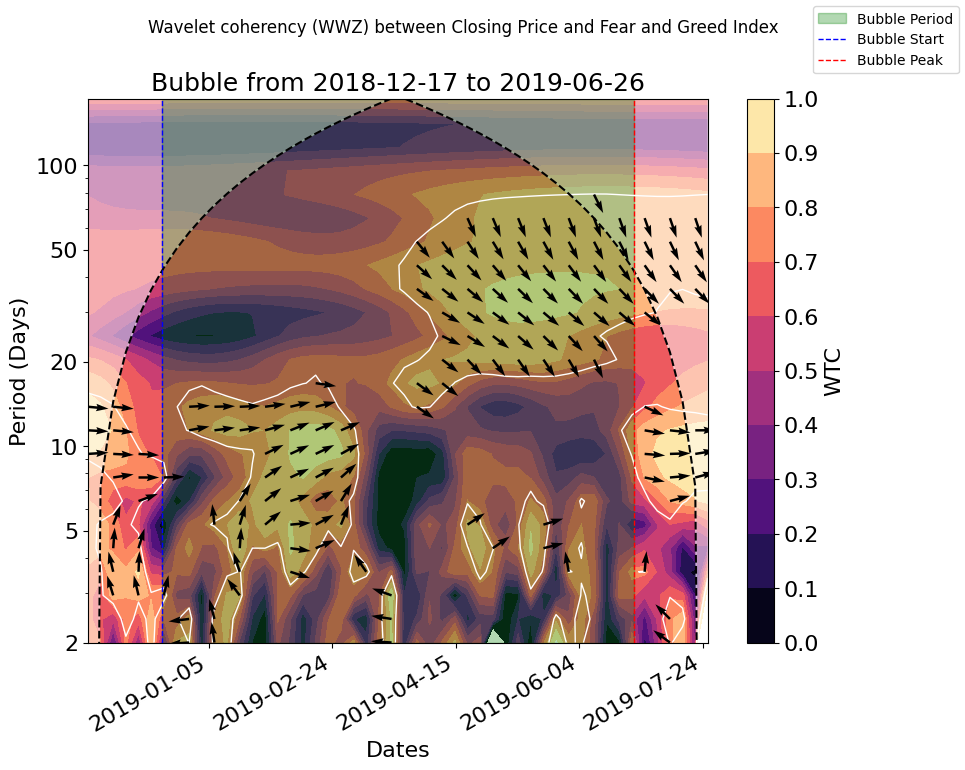

In [ ]:
import matplotlib.pyplot as plt

# Ensure bubble_table and the original matrix0 (full data) are available and have correct date formats
if 'bubble_table' not in globals() or 'matrix0' not in globals():
    print("Error: 'bubble_table' or 'matrix0' DataFrames not found.")
else:
    bubble_table['Peak Date'] = pd.to_datetime(bubble_table['Peak Date'])
    bubble_table['Bubble Start Date'] = pd.to_datetime(bubble_table['Bubble Start Date'])
    matrix0['Date'] = pd.to_datetime(matrix0['Date'])

    # Get the first bubble's start and peak dates from the bubble_table
    first_bubble = bubble_table.iloc[0]
    start_date = pd.to_datetime(first_bubble['Bubble Start Date'])
    peak_date = pd.to_datetime(first_bubble['Peak Date'])

    # Define the date range for the new matrix2 (30 days before start and 30 days after peak)
    matrix2_start_date = start_date - timedelta(days=30)
    matrix2_end_date = peak_date + timedelta(days=30)

    # Filter the original matrix0 for the defined date range
    matrix2_first_bubble = matrix0[(matrix0['Date'] >= matrix2_start_date) & (matrix0['Date'] <= matrix2_end_date)].copy()

    # Reset the 'time' column based on the filtered DataFrame's length
    matrix2_first_bubble['time'] = range(1, len(matrix2_first_bubble) + 1)

    # Create pyleoclim Series objects for 'closing_price' and 'fear_greed_index' using the filtered data
    closing_price_ts_bubble = pyleo.Series(
        time=matrix2_first_bubble['time'],
        value=matrix2_first_bubble['closing_price'], # Using raw price
        time_name='Time',
        value_name='Closing Price',
        time_unit='unit',
        label='Closing Price'
    )

    fng_ts_bubble = pyleo.Series(
        time=matrix2_first_bubble['time'],
        value=matrix2_first_bubble['fear_greed_index'], # Using raw F&G index
        time_name='Time',
        value_name='Fear and Greed Index',
        time_unit='unit',
        label='Fear and Greed Index'
    )

    # Calculate wavelet coherence for the single bubble period
    coh_bubble = closing_price_ts_bubble.wavelet_coherence(fng_ts_bubble, method='wwz')

    # Perform significance test
    coh_sig_bubble = coh_bubble.signif_test(method='CN', number=40) # You can adjust the number of surrogates

    # Plot the wavelet coherence with significance
    fig, ax = coh_sig_bubble.plot()

    # Set x-axis limits based on the time values of the filtered data
    ax.set_xlim(matrix2_first_bubble['time'].min(), matrix2_first_bubble['time'].max())

    # Improve x-axis tick formatting to show dates instead of time units
    # Create a mapping from time to date using the filtered matrix2
    time_to_date_map_bubble = matrix2_first_bubble.set_index('time')['Date']

    # Function to format ticks
    def format_time_ticks_as_dates_bubble(x, pos):
        # Find the closest date for the given time value
        closest_time = min(time_to_date_map_bubble.index, key=lambda t: abs(t - x))
        return time_to_date_map_bubble.loc[closest_time].strftime('%Y-%m-%d')

    # Apply the custom formatter
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_time_ticks_as_dates_bubble))

    # Improve date tick readability
    fig.autofmt_xdate()

    # Highlight the bubble period with vertical lines and shading
    # Find the corresponding time values for the bubble start and peak dates within the filtered data
    date_to_time_map_bubble = matrix2_first_bubble.set_index('Date')['time']

    if start_date in date_to_time_map_bubble.index and peak_date in date_to_time_map_bubble.index:
        start_bubble_time = date_to_time_map_bubble.loc[start_date]
        end_bubble_time = date_to_time_map_bubble.loc[peak_date]

        # Add shaded region
        ax.axvspan(start_bubble_time, end_bubble_time, color='green', alpha=0.3, label='Bubble Period')

        # Add vertical lines
        ax.axvline(start_bubble_time, color='blue', linestyle='--', linewidth=1, label='Bubble Start')
        ax.axvline(end_bubble_time, color='red', linestyle='--', linewidth=1, label='Bubble Peak')

    else:
        print("Warning: Bubble start or peak dates not found in the filtered data range.")

    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')

    # Set title
#    plt.title(f'Bubble from {start_date.date()} to {peak_date.date()}')

plt.rcParams.update({'axes.labelsize': 16})   # etichette assi
plt.rcParams.update({'xtick.labelsize': 16})  # numeri asse X
plt.rcParams.update({'ytick.labelsize': 16})  # numeri asse Y
plt.rcParams.update({'legend.fontsize': 10})  # legenda

# Set the title and y-axis label
ax.set_title(f'Bubble from {start_date.date()} to {peak_date.date()}', fontsize=18)
ax.set_ylabel('Period (Days)')
ax.set_xlabel('Dates')

plt.show()

### Seconda bolla

Time axis values sorted in ascending order
Time axis values sorted in ascending order


Performing wavelet coherence on surrogate pairs: 100%|██████████| 40/40 [21:43<00:00, 32.58s/it]


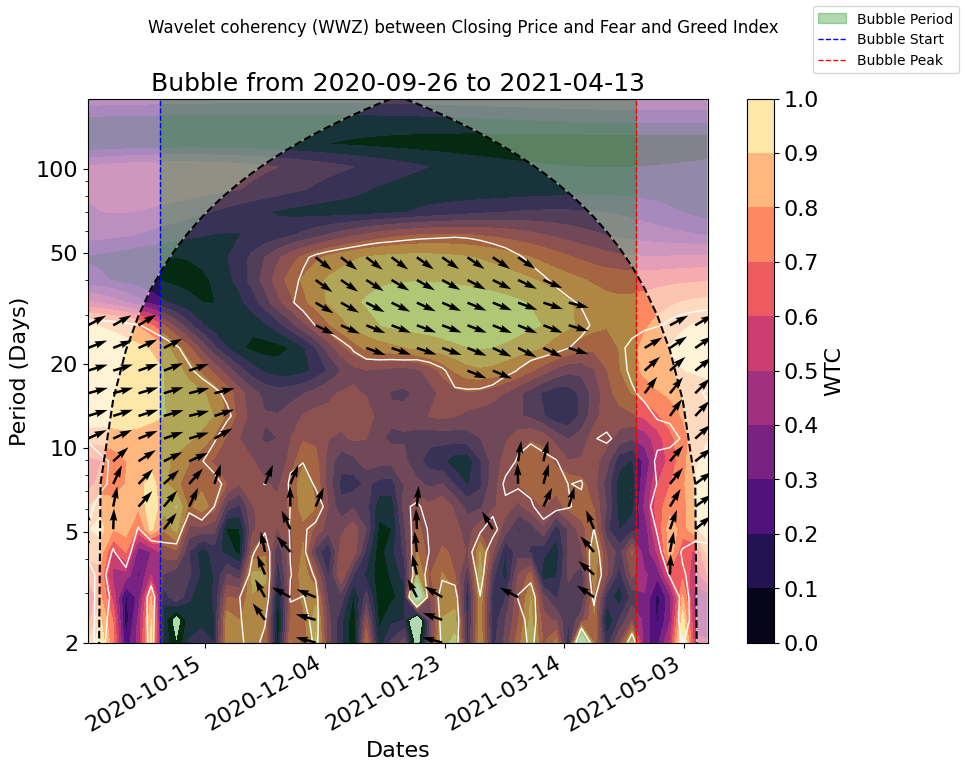

In [ ]:
import matplotlib.pyplot as plt

# Ensure bubble_table and the original matrix0 (full data) are available and have correct date formats
if 'bubble_table' not in globals() or 'matrix0' not in globals():
    print("Error: 'bubble_table' or 'matrix0' DataFrames not found.")
else:
    bubble_table['Peak Date'] = pd.to_datetime(bubble_table['Peak Date'])
    bubble_table['Bubble Start Date'] = pd.to_datetime(bubble_table['Bubble Start Date'])
    matrix0['Date'] = pd.to_datetime(matrix0['Date'])

    # Get the second bubble's start and peak dates from the bubble_table (index 1 for the second row)
    second_bubble = bubble_table.iloc[1]
    start_date = pd.to_datetime(second_bubble['Bubble Start Date'])
    peak_date = pd.to_datetime(second_bubble['Peak Date'])

    # Define the date range for the new matrix2 (30 days before start and 30 days after peak)
    matrix2_start_date = start_date - timedelta(days=30)
    matrix2_end_date = peak_date + timedelta(days=30)

    # Filter the original matrix0 for the defined date range
    matrix2_second_bubble = matrix0[(matrix0['Date'] >= matrix2_start_date) & (matrix0['Date'] <= matrix2_end_date)].copy()

    # Reset the 'time' column based on the filtered DataFrame's length
    matrix2_second_bubble['time'] = range(1, len(matrix2_second_bubble) + 1)

    # Create pyleoclim Series objects for 'closing_price' and 'fear_greed_index' using the filtered data
    closing_price_ts_bubble = pyleo.Series(
        time=matrix2_second_bubble['time'],
        value=matrix2_second_bubble['closing_price'], # Using raw price
        time_name='Time',
        value_name='Closing Price',
        time_unit='unit',
        label='Closing Price'
    )

    fng_ts_bubble = pyleo.Series(
        time=matrix2_second_bubble['time'],
        value=matrix2_second_bubble['fear_greed_index'], # Using raw F&G index
        time_name='Time',
        value_name='Fear and Greed Index',
        time_unit='unit',
        label='Fear and Greed Index'
    )

    # Calculate wavelet coherence for the single bubble period
    coh_bubble = closing_price_ts_bubble.wavelet_coherence(fng_ts_bubble, method='wwz')

    # Perform significance test
    coh_sig_bubble = coh_bubble.signif_test(method='CN', number=40) # You can adjust the number of surrogates

    # Plot the wavelet coherence with significance
    fig, ax = coh_sig_bubble.plot()

    # Set x-axis limits based on the time values of the filtered data
    ax.set_xlim(matrix2_second_bubble['time'].min(), matrix2_second_bubble['time'].max())

    # Improve x-axis tick formatting to show dates instead of time units
    # Create a mapping from time to date using the filtered matrix2
    time_to_date_map_bubble = matrix2_second_bubble.set_index('time')['Date']

    # Function to format ticks
    def format_time_ticks_as_dates_bubble(x, pos):
        # Find the closest date for the given time value
        closest_time = min(time_to_date_map_bubble.index, key=lambda t: abs(t - x))
        return time_to_date_map_bubble.loc[closest_time].strftime('%Y-%m-%d')

    # Apply the custom formatter
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_time_ticks_as_dates_bubble))

    # Improve date tick readability
    fig.autofmt_xdate()

    # Highlight the bubble period with vertical lines and shading
    # Find the corresponding time values for the bubble start and peak dates within the filtered data
    date_to_time_map_bubble = matrix2_second_bubble.set_index('Date')['time']

    if start_date in date_to_time_map_bubble.index and peak_date in date_to_time_map_bubble.index:
        start_bubble_time = date_to_time_map_bubble.loc[start_date]
        end_bubble_time = date_to_time_map_bubble.loc[peak_date]

        # Add shaded region
        ax.axvspan(start_bubble_time, end_bubble_time, color='green', alpha=0.3, label='Bubble Period')

        # Add vertical lines
        ax.axvline(start_bubble_time, color='blue', linestyle='--', linewidth=1, label='Bubble Start')
        ax.axvline(end_bubble_time, color='red', linestyle='--', linewidth=1, label='Bubble Peak')

    else:
        print("Warning: Bubble start or peak dates not found in the filtered data range.")

    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')

    # Set title
    #plt.title(f'Wavelet Coherence (BTC Price vs F&G Index) with Significance - Bubble from {start_date.date()} to {peak_date.date()}')

plt.rcParams.update({'axes.labelsize': 16})   # etichette assi
plt.rcParams.update({'xtick.labelsize': 16})  # numeri asse X
plt.rcParams.update({'ytick.labelsize': 16})  # numeri asse Y
plt.rcParams.update({'legend.fontsize': 10})  # legenda

# Set the title and y-axis label
ax.set_title(f'Bubble from {start_date.date()} to {peak_date.date()}', fontsize=18)
ax.set_ylabel('Period (Days)')
ax.set_xlabel('Dates')

plt.show()

### Third bubble B3

Time axis values sorted in ascending order
Time axis values sorted in ascending order


Performing wavelet coherence on surrogate pairs: 100%|██████████| 40/40 [20:02<00:00, 30.05s/it]


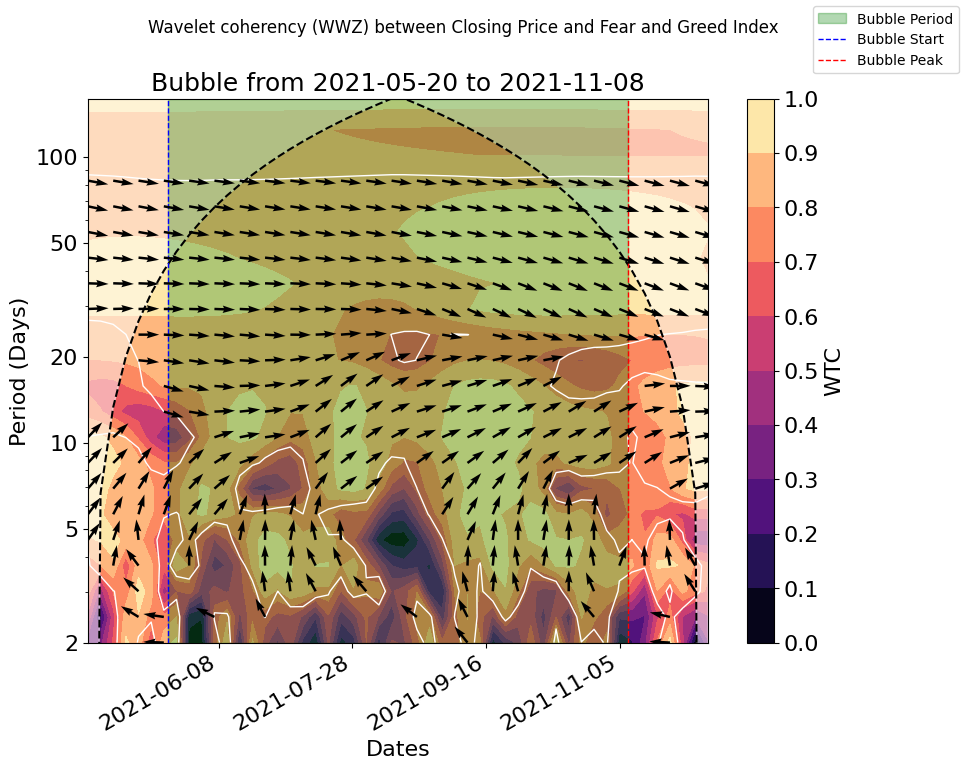

In [ ]:
import matplotlib.pyplot as plt

# Ensure bubble_table and the original matrix0 (full data) are available and have correct date formats
if 'bubble_table' not in globals() or 'matrix0' not in globals():
    print("Error: 'bubble_table' or 'matrix0' DataFrames not found.")
else:
    bubble_table['Peak Date'] = pd.to_datetime(bubble_table['Peak Date'])
    bubble_table['Bubble Start Date'] = pd.to_datetime(bubble_table['Bubble Start Date'])
    matrix0['Date'] = pd.to_datetime(matrix0['Date'])

    # Get the third bubble's start and peak dates from the bubble_table (index 2 for the third row)
    third_bubble = bubble_table.iloc[2]
    start_date = pd.to_datetime(third_bubble['Bubble Start Date'])
    peak_date = pd.to_datetime(third_bubble['Peak Date'])

    # Define the date range for the new matrix2 (30 days before start and 30 days after peak)
    matrix2_start_date = start_date - timedelta(days=30)
    matrix2_end_date = peak_date + timedelta(days=30)

    # Filter the original matrix0 for the defined date range
    matrix2_third_bubble = matrix0[(matrix0['Date'] >= matrix2_start_date) & (matrix0['Date'] <= matrix2_end_date)].copy()

    # Reset the 'time' column based on the filtered DataFrame's length
    matrix2_third_bubble['time'] = range(1, len(matrix2_third_bubble) + 1)

    # Create pyleoclim Series objects for 'closing_price' and 'fear_greed_index' using the filtered data
    closing_price_ts_bubble = pyleo.Series(
        time=matrix2_third_bubble['time'],
        value=matrix2_third_bubble['closing_price'], # Using raw price
        time_name='Time',
        value_name='Closing Price',
        time_unit='unit',
        label='Closing Price'
    )

    fng_ts_bubble = pyleo.Series(
        time=matrix2_third_bubble['time'],
        value=matrix2_third_bubble['fear_greed_index'], # Using raw F&G index
        time_name='Time',
        value_name='Fear and Greed Index',
        time_unit='unit',
        label='Fear and Greed Index'
    )

    # Calculate wavelet coherence for the single bubble period
    coh_bubble = closing_price_ts_bubble.wavelet_coherence(fng_ts_bubble, method='wwz')

    # Perform significance test
    coh_sig_bubble = coh_bubble.signif_test(method='CN', number=40) # You can adjust the number of surrogates

    # Plot the wavelet coherence with significance
    fig, ax = coh_sig_bubble.plot()

    # Set x-axis limits based on the time values of the filtered data
    ax.set_xlim(matrix2_third_bubble['time'].min(), matrix2_third_bubble['time'].max())

    # Improve x-axis tick formatting to show dates instead of time units
    # Create a mapping from time to date using the filtered matrix2
    time_to_date_map_bubble = matrix2_third_bubble.set_index('time')['Date']

    # Function to format ticks
    def format_time_ticks_as_dates_bubble(x, pos):
        # Find the closest date for the given time value
        closest_time = min(time_to_date_map_bubble.index, key=lambda t: abs(t - x))
        return time_to_date_map_bubble.loc[closest_time].strftime('%Y-%m-%d')

    # Apply the custom formatter
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_time_ticks_as_dates_bubble))

    # Improve date tick readability
    fig.autofmt_xdate()

    # Highlight the bubble period with vertical lines and shading
    # Find the corresponding time values for the bubble start and peak dates within the filtered data
    date_to_time_map_bubble = matrix2_third_bubble.set_index('Date')['time']

    if start_date in date_to_time_map_bubble.index and peak_date in date_to_time_map_bubble.index:
        start_bubble_time = date_to_time_map_bubble.loc[start_date]
        end_bubble_time = date_to_time_map_bubble.loc[peak_date]

        # Add shaded region
        ax.axvspan(start_bubble_time, end_bubble_time, color='green', alpha=0.3, label='Bubble Period')

        # Add vertical lines
        ax.axvline(start_bubble_time, color='blue', linestyle='--', linewidth=1, label='Bubble Start')
        ax.axvline(end_bubble_time, color='red', linestyle='--', linewidth=1, label='Bubble Peak')

    else:
        print("Warning: Bubble start or peak dates not found in the filtered data range.")

    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')

    # Set title
#    plt.title(f'Wavelet Coherence (BTC Price vs F&G Index) with Significance - Bubble from {start_date.date()} to {peak_date.date()}')

plt.rcParams.update({'axes.labelsize': 16})   # etichette assi
plt.rcParams.update({'xtick.labelsize': 16})  # numeri asse X
plt.rcParams.update({'ytick.labelsize': 16})  # numeri asse Y
plt.rcParams.update({'legend.fontsize': 10})  # legenda

# Set the title and y-axis label
ax.set_title(f'Bubble from {start_date.date()} to {peak_date.date()}', fontsize=18)
ax.set_ylabel('Period (Days)')
ax.set_xlabel('Dates')

plt.show()

### Fourth Bubble B4

Time axis values sorted in ascending order
Time axis values sorted in ascending order


Performing wavelet coherence on surrogate pairs: 100%|██████████| 40/40 [19:46<00:00, 29.66s/it]


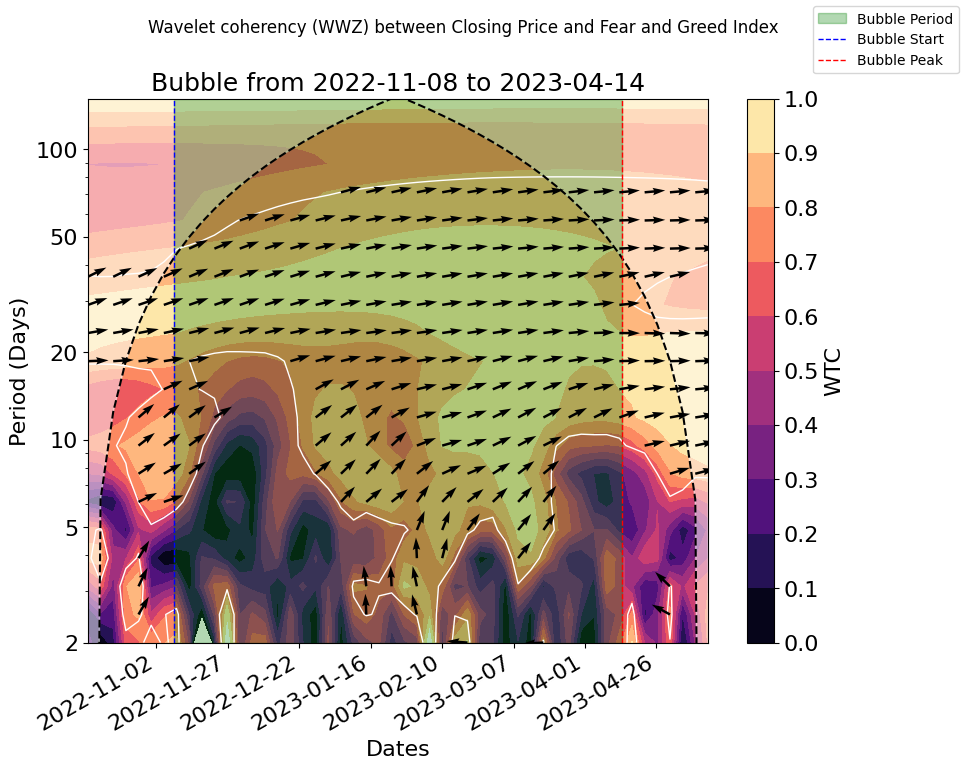

In [ ]:
import matplotlib.pyplot as plt

# Ensure bubble_table and the original matrix0 (full data) are available and have correct date formats
if 'bubble_table' not in globals() or 'matrix0' not in globals():
    print("Error: 'bubble_table' or 'matrix0' DataFrames not found.")
else:
    bubble_table['Peak Date'] = pd.to_datetime(bubble_table['Peak Date'])
    bubble_table['Bubble Start Date'] = pd.to_datetime(bubble_table['Bubble Start Date'])
    matrix0['Date'] = pd.to_datetime(matrix0['Date'])

    # Get the fourth bubble's start and peak dates from the bubble_table (index 3 for the fourth row)
    fourth_bubble = bubble_table.iloc[3]
    start_date = pd.to_datetime(fourth_bubble['Bubble Start Date'])
    peak_date = pd.to_datetime(fourth_bubble['Peak Date'])

    # Define the date range for the new matrix2 (30 days before start and 30 days after peak)
    matrix2_start_date = start_date - timedelta(days=30)
    matrix2_end_date = peak_date + timedelta(days=30)

    # Filter the original matrix0 for the defined date range
    matrix2_fourth_bubble = matrix0[(matrix0['Date'] >= matrix2_start_date) & (matrix0['Date'] <= matrix2_end_date)].copy()

    # Reset the 'time' column based on the filtered DataFrame's length
    matrix2_fourth_bubble['time'] = range(1, len(matrix2_fourth_bubble) + 1)

    # Create pyleoclim Series objects for 'closing_price' and 'fear_greed_index' using the filtered data
    closing_price_ts_bubble = pyleo.Series(
        time=matrix2_fourth_bubble['time'],
        value=matrix2_fourth_bubble['closing_price'], # Using raw price
        time_name='Time',
        value_name='Closing Price',
        time_unit='unit',
        label='Closing Price'
    )

    fng_ts_bubble = pyleo.Series(
        time=matrix2_fourth_bubble['time'],
        value=matrix2_fourth_bubble['fear_greed_index'], # Using raw F&G index
        time_name='Time',
        value_name='Fear and Greed Index',
        time_unit='unit',
        label='Fear and Greed Index'
    )

    # Calculate wavelet coherence for the single bubble period
    coh_bubble = closing_price_ts_bubble.wavelet_coherence(fng_ts_bubble, method='wwz')

    # Perform significance test
    coh_sig_bubble = coh_bubble.signif_test(method='CN', number=40) # You can adjust the number of surrogates

    # Plot the wavelet coherence with significance
    fig, ax = coh_sig_bubble.plot()

    # Set x-axis limits based on the time values of the filtered data
    ax.set_xlim(matrix2_fourth_bubble['time'].min(), matrix2_fourth_bubble['time'].max())

    # Improve x-axis tick formatting to show dates instead of time units
    # Create a mapping from time to date using the filtered matrix2
    time_to_date_map_bubble = matrix2_fourth_bubble.set_index('time')['Date']

    # Function to format ticks
    def format_time_ticks_as_dates_bubble(x, pos):
        # Find the closest date for the given time value
        closest_time = min(time_to_date_map_bubble.index, key=lambda t: abs(t - x))
        return time_to_date_map_bubble.loc[closest_time].strftime('%Y-%m-%d')

    # Apply the custom formatter
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_time_ticks_as_dates_bubble))

    # Improve date tick readability
    fig.autofmt_xdate()

    # Highlight the bubble period with vertical lines and shading
    # Find the corresponding time values for the bubble start and peak dates within the filtered data
    date_to_time_map_bubble = matrix2_fourth_bubble.set_index('Date')['time']

    if start_date in date_to_time_map_bubble.index and peak_date in date_to_time_map_bubble.index:
        start_bubble_time = date_to_time_map_bubble.loc[start_date]
        end_bubble_time = date_to_time_map_bubble.loc[peak_date]

        # Add shaded region
        ax.axvspan(start_bubble_time, end_bubble_time, color='green', alpha=0.3, label='Bubble Period')

        # Add vertical lines
        ax.axvline(start_bubble_time, color='blue', linestyle='--', linewidth=1, label='Bubble Start')
        ax.axvline(end_bubble_time, color='red', linestyle='--', linewidth=1, label='Bubble Peak')

    else:
        print("Warning: Bubble start or peak dates not found in the filtered data range.")

    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')

plt.rcParams.update({'axes.labelsize': 16})   # etichette assi
plt.rcParams.update({'xtick.labelsize': 16})  # numeri asse X
plt.rcParams.update({'ytick.labelsize': 16})  # numeri asse Y
plt.rcParams.update({'legend.fontsize': 10})  # legenda

# Set the title and y-axis label
ax.set_title(f'Bubble from {start_date.date()} to {peak_date.date()}', fontsize=18)
ax.set_ylabel('Period (Days)')
ax.set_xlabel('Dates')

plt.show()

### Fifth Bubble b5

Time axis values sorted in ascending order
Time axis values sorted in ascending order


Performing wavelet coherence on surrogate pairs: 100%|██████████| 40/40 [20:56<00:00, 31.42s/it]


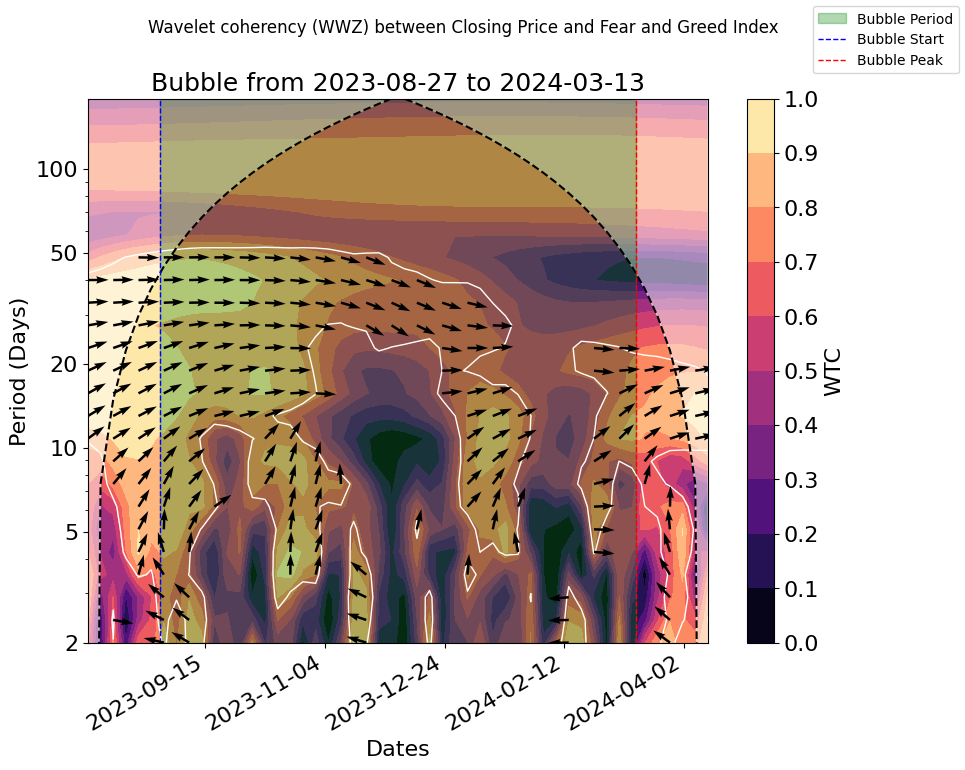

In [ ]:
import matplotlib.pyplot as plt

# Ensure bubble_table and the original matrix0 (full data) are available and have correct date formats
if 'bubble_table' not in globals() or 'matrix0' not in globals():
    print("Error: 'bubble_table' or 'matrix0' DataFrames not found.")
else:
    bubble_table['Peak Date'] = pd.to_datetime(bubble_table['Peak Date'])
    bubble_table['Bubble Start Date'] = pd.to_datetime(bubble_table['Bubble Start Date'])
    matrix0['Date'] = pd.to_datetime(matrix0['Date'])

    # Get the fifth bubble's start and peak dates from the bubble_table (index 4 for the fifth row)
    fifth_bubble = bubble_table.iloc[4]
    start_date = pd.to_datetime(fifth_bubble['Bubble Start Date'])
    peak_date = pd.to_datetime(fifth_bubble['Peak Date'])

    # Define the date range for the new matrix2 (30 days before start and 30 days after peak)
    matrix2_start_date = start_date - timedelta(days=30)
    matrix2_end_date = peak_date + timedelta(days=30)

    # Filter the original matrix0 for the defined date range
    matrix2_fifth_bubble = matrix0[(matrix0['Date'] >= matrix2_start_date) & (matrix0['Date'] <= matrix2_end_date)].copy()

    # Reset the 'time' column based on the filtered DataFrame's length
    matrix2_fifth_bubble['time'] = range(1, len(matrix2_fifth_bubble) + 1)

    # Create pyleoclim Series objects for 'closing_price' and 'fear_greed_index' using the filtered data
    closing_price_ts_bubble = pyleo.Series(
        time=matrix2_fifth_bubble['time'],
        value=matrix2_fifth_bubble['closing_price'], # Using raw price
        time_name='Time',
        value_name='Closing Price',
        time_unit='unit',
        label='Closing Price'
    )

    fng_ts_bubble = pyleo.Series(
        time=matrix2_fifth_bubble['time'],
        value=matrix2_fifth_bubble['fear_greed_index'], # Using raw F&G index
        time_name='Time',
        value_name='Fear and Greed Index',
        time_unit='unit',
        label='Fear and Greed Index'
    )

    # Calculate wavelet coherence for the single bubble period
    coh_bubble = closing_price_ts_bubble.wavelet_coherence(fng_ts_bubble, method='wwz')

    # Perform significance test
    coh_sig_bubble = coh_bubble.signif_test(method='CN', number=40) # You can adjust the number of surrogates

    # Plot the wavelet coherence with significance
    fig, ax = coh_sig_bubble.plot()

    # Set x-axis limits based on the time values of the filtered data
    ax.set_xlim(matrix2_fifth_bubble['time'].min(), matrix2_fifth_bubble['time'].max())

    # Improve x-axis tick formatting to show dates instead of time units
    # Create a mapping from time to date using the filtered matrix2
    time_to_date_map_bubble = matrix2_fifth_bubble.set_index('time')['Date']

    # Function to format ticks
    def format_time_ticks_as_dates_bubble(x, pos):
        # Find the closest date for the given time value
        closest_time = min(time_to_date_map_bubble.index, key=lambda t: abs(t - x))
        return time_to_date_map_bubble.loc[closest_time].strftime('%Y-%m-%d')

    # Apply the custom formatter
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_time_ticks_as_dates_bubble))

    # Improve date tick readability
    fig.autofmt_xdate()

    # Highlight the bubble period with vertical lines and shading
    # Find the corresponding time values for the bubble start and peak dates within the filtered data
    date_to_time_map_bubble = matrix2_fifth_bubble.set_index('Date')['time']

    if start_date in date_to_time_map_bubble.index and peak_date in date_to_time_map_bubble.index:
        start_bubble_time = date_to_time_map_bubble.loc[start_date]
        end_bubble_time = date_to_time_map_bubble.loc[peak_date]

        # Add shaded region
        ax.axvspan(start_bubble_time, end_bubble_time, color='green', alpha=0.3, label='Bubble Period')

        # Add vertical lines
        ax.axvline(start_bubble_time, color='blue', linestyle='--', linewidth=1, label='Bubble Start')
        ax.axvline(end_bubble_time, color='red', linestyle='--', linewidth=1, label='Bubble Peak')

    else:
        print("Warning: Bubble start or peak dates not found in the filtered data range.")

    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')

plt.rcParams.update({'axes.labelsize': 16})   # etichette assi
plt.rcParams.update({'xtick.labelsize': 16})  # numeri asse X
plt.rcParams.update({'ytick.labelsize': 16})  # numeri asse Y
plt.rcParams.update({'legend.fontsize': 10})  # legenda

# Set the title and y-axis label
ax.set_title(f'Bubble from {start_date.date()} to {peak_date.date()}', fontsize=18)
ax.set_ylabel('Period (Days)')
ax.set_xlabel('Dates')

plt.show()

### **Bubble** 6

Time axis values sorted in ascending order
Time axis values sorted in ascending order


Performing wavelet coherence on surrogate pairs: 100%|██████████| 40/40 [21:04<00:00, 31.62s/it]


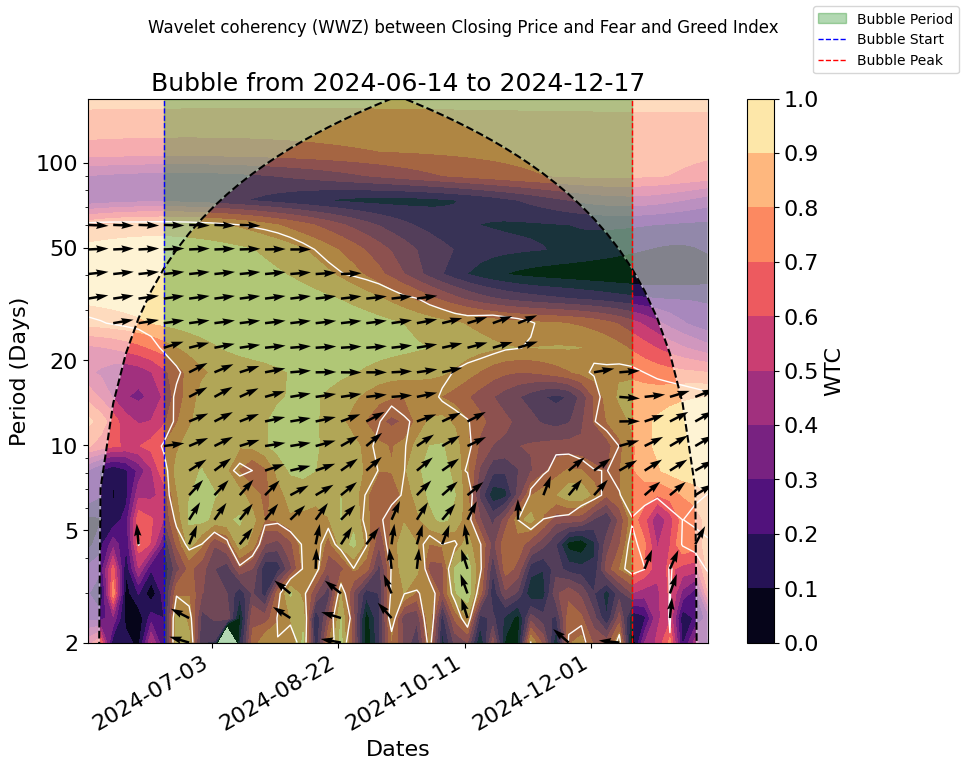

In [ ]:
import matplotlib.pyplot as plt

# Ensure bubble_table and the original matrix0 (full data) are available and have correct date formats
if 'bubble_table' not in globals() or 'matrix0' not in globals():
    print("Error: 'bubble_table' or 'matrix0' DataFrames not found.")
else:
    bubble_table['Peak Date'] = pd.to_datetime(bubble_table['Peak Date'])
    bubble_table['Bubble Start Date'] = pd.to_datetime(bubble_table['Bubble Start Date'])
    matrix0['Date'] = pd.to_datetime(matrix0['Date'])

    # Get the sixth bubble's start and peak dates from the bubble_table (index 5 for the sixth row)
    sixth_bubble = bubble_table.iloc[5]
    start_date = pd.to_datetime(sixth_bubble['Bubble Start Date'])
    peak_date = pd.to_datetime(sixth_bubble['Peak Date'])

    # Define the date range for the new matrix2 (30 days before start and 30 days after peak)
    matrix2_start_date = start_date - timedelta(days=30)
    matrix2_end_date = peak_date + timedelta(days=30)

    # Filter the original matrix0 for the defined date range
    matrix2_sixth_bubble = matrix0[(matrix0['Date'] >= matrix2_start_date) & (matrix0['Date'] <= matrix2_end_date)].copy()

    # Reset the 'time' column based on the filtered DataFrame's length
    matrix2_sixth_bubble['time'] = range(1, len(matrix2_sixth_bubble) + 1)

    # Create pyleoclim Series objects for 'closing_price' and 'fear_greed_index' using the filtered data
    closing_price_ts_bubble = pyleo.Series(
        time=matrix2_sixth_bubble['time'],
        value=matrix2_sixth_bubble['closing_price'], # Using raw price
        time_name='Time',
        value_name='Closing Price',
        time_unit='unit',
        label='Closing Price'
    )

    fng_ts_bubble = pyleo.Series(
        time=matrix2_sixth_bubble['time'],
        value=matrix2_sixth_bubble['fear_greed_index'], # Using raw F&G index
        time_name='Time',
        value_name='Fear and Greed Index',
        time_unit='unit',
        label='Fear and Greed Index'
    )

    # Calculate wavelet coherence for the single bubble period
    coh_bubble = closing_price_ts_bubble.wavelet_coherence(fng_ts_bubble, method='wwz')

    # Perform significance test
    coh_sig_bubble = coh_bubble.signif_test(method='CN', number=40) # You can adjust the number of surrogates

    # Plot the wavelet coherence with significance
    fig, ax = coh_sig_bubble.plot()

    # Set x-axis limits based on the time values of the filtered data
    ax.set_xlim(matrix2_sixth_bubble['time'].min(), matrix2_sixth_bubble['time'].max())

    # Improve x-axis tick formatting to show dates instead of time units
    # Create a mapping from time to date using the filtered matrix2
    time_to_date_map_bubble = matrix2_sixth_bubble.set_index('time')['Date']

    # Function to format ticks
    def format_time_ticks_as_dates_bubble(x, pos):
        # Find the closest date for the given time value
        closest_time = min(time_to_date_map_bubble.index, key=lambda t: abs(t - x))
        return time_to_date_map_bubble.loc[closest_time].strftime('%Y-%m-%d')

    # Apply the custom formatter
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_time_ticks_as_dates_bubble))

    # Improve date tick readability
    fig.autofmt_xdate()

    # Highlight the bubble period with vertical lines and shading
    # Find the corresponding time values for the bubble start and peak dates within the filtered data
    date_to_time_map_bubble = matrix2_sixth_bubble.set_index('Date')['time']

    if start_date in date_to_time_map_bubble.index and peak_date in date_to_time_map_bubble.index:
        start_bubble_time = date_to_time_map_bubble.loc[start_date]
        end_bubble_time = date_to_time_map_bubble.loc[peak_date]

        # Add shaded region
        ax.axvspan(start_bubble_time, end_bubble_time, color='green', alpha=0.3, label='Bubble Period')

        # Add vertical lines
        ax.axvline(start_bubble_time, color='blue', linestyle='--', linewidth=1, label='Bubble Start')
        ax.axvline(end_bubble_time, color='red', linestyle='--', linewidth=1, label='Bubble Peak')

    else:
        print("Warning: Bubble start or peak dates not found in the filtered data range.")

    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')

plt.rcParams.update({'axes.labelsize': 16})   # etichette assi
plt.rcParams.update({'xtick.labelsize': 16})  # numeri asse X
plt.rcParams.update({'ytick.labelsize': 16})  # numeri asse Y
plt.rcParams.update({'legend.fontsize': 10})  # legenda

# Set the title and y-axis label
ax.set_title(f'Bubble from {start_date.date()} to {peak_date.date()}', fontsize=18)
ax.set_ylabel('Period (Days)')
ax.set_xlabel('Dates')

plt.show()

### Bolla 7

Time axis values sorted in ascending order
Time axis values sorted in ascending order


Performing wavelet coherence on surrogate pairs: 100%|██████████| 40/40 [19:13<00:00, 28.84s/it]


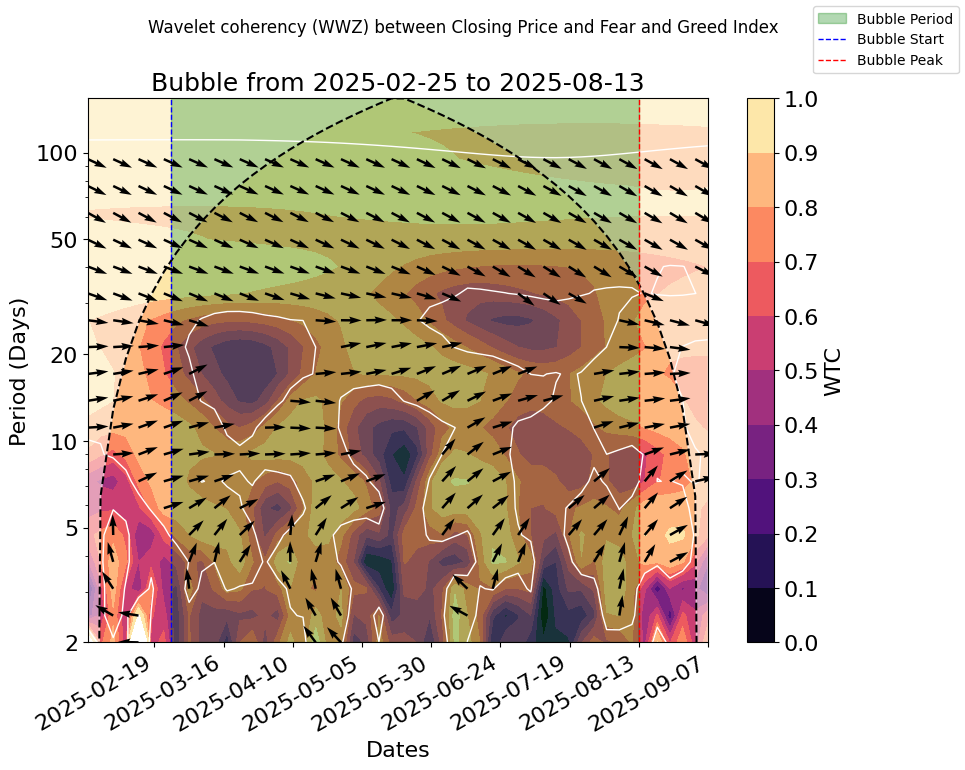

In [ ]:
import matplotlib.pyplot as plt

# Ensure bubble_table and the original matrix0 (full data) are available and have correct date formats
if 'bubble_table' not in globals() or 'matrix0' not in globals():
    print("Error: 'bubble_table' or 'matrix0' DataFrames not found.")
else:
    bubble_table['Peak Date'] = pd.to_datetime(bubble_table['Peak Date'])
    bubble_table['Bubble Start Date'] = pd.to_datetime(bubble_table['Bubble Start Date'])
    matrix0['Date'] = pd.to_datetime(matrix0['Date'])

    # Get the seventh bubble's start and peak dates from the bubble_table (index 6 for the seventh row)
    seventh_bubble = bubble_table.iloc[6]
    start_date = pd.to_datetime(seventh_bubble['Bubble Start Date'])
    peak_date = pd.to_datetime(seventh_bubble['Peak Date'])

    # Define the date range for the new matrix2 (30 days before start and 30 days after peak)
    matrix2_start_date = start_date - timedelta(days=30)
    matrix2_end_date = peak_date + timedelta(days=30)

    # Filter the original matrix0 for the defined date range
    matrix2_seventh_bubble = matrix0[(matrix0['Date'] >= matrix2_start_date) & (matrix0['Date'] <= matrix2_end_date)].copy()

    # Reset the 'time' column based on the filtered DataFrame's length
    matrix2_seventh_bubble['time'] = range(1, len(matrix2_seventh_bubble) + 1)

    # Create pyleoclim Series objects for 'closing_price' and 'fear_greed_index' using the filtered data
    closing_price_ts_bubble = pyleo.Series(
        time=matrix2_seventh_bubble['time'],
        value=matrix2_seventh_bubble['closing_price'], # Using raw price
        time_name='Time',
        value_name='Closing Price',
        time_unit='unit',
        label='Closing Price'
    )

    fng_ts_bubble = pyleo.Series(
        time=matrix2_seventh_bubble['time'],
        value=matrix2_seventh_bubble['fear_greed_index'], # Using raw F&G index
        time_name='Time',
        value_name='Fear and Greed Index',
        time_unit='unit',
        label='Fear and Greed Index'
    )

    # Calculate wavelet coherence for the single bubble period
    coh_bubble = closing_price_ts_bubble.wavelet_coherence(fng_ts_bubble, method='wwz')

    # Perform significance test
    coh_sig_bubble = coh_bubble.signif_test(method='CN', number=40) # You can adjust the number of surrogates

    # Plot the wavelet coherence with significance
    fig, ax = coh_sig_bubble.plot()

    # Set x-axis limits based on the time values of the filtered data
    ax.set_xlim(matrix2_seventh_bubble['time'].min(), matrix2_seventh_bubble['time'].max())

    # Improve x-axis tick formatting to show dates instead of time units
    # Create a mapping from time to date using the filtered matrix2
    time_to_date_map_bubble = matrix2_seventh_bubble.set_index('time')['Date']

    # Function to format ticks
    def format_time_ticks_as_dates_bubble(x, pos):
        # Find the closest date for the given time value
        closest_time = min(time_to_date_map_bubble.index, key=lambda t: abs(t - x))
        return time_to_date_map_bubble.loc[closest_time].strftime('%Y-%m-%d')

    # Apply the custom formatter
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_time_ticks_as_dates_bubble))

    # Improve date tick readability
    fig.autofmt_xdate()

    # Highlight the bubble period with vertical lines and shading
    # Find the corresponding time values for the bubble start and peak dates within the filtered data
    date_to_time_map_bubble = matrix2_seventh_bubble.set_index('Date')['time']

    if start_date in date_to_time_map_bubble.index and peak_date in date_to_time_map_bubble.index:
        start_bubble_time = date_to_time_map_bubble.loc[start_date]
        end_bubble_time = date_to_time_map_bubble.loc[peak_date]

        # Add shaded region
        ax.axvspan(start_bubble_time, end_bubble_time, color='green', alpha=0.3, label='Bubble Period')

        # Add vertical lines
        ax.axvline(start_bubble_time, color='blue', linestyle='--', linewidth=1, label='Bubble Start')
        ax.axvline(end_bubble_time, color='red', linestyle='--', linewidth=1, label='Bubble Peak')

    else:
        print("Warning: Bubble start or peak dates not found in the filtered data range.")

    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')

plt.rcParams.update({'axes.labelsize': 16})   # etichette assi
plt.rcParams.update({'xtick.labelsize': 16})  # numeri asse X
plt.rcParams.update({'ytick.labelsize': 16})  # numeri asse Y
plt.rcParams.update({'legend.fontsize': 10})  # legenda

# Set the title and y-axis label
ax.set_title(f'Bubble from {start_date.date()} to {peak_date.date()}', fontsize=18)
ax.set_ylabel('Period (Days)')
ax.set_xlabel('Dates')

plt.show()

# Plot FGI e BTC

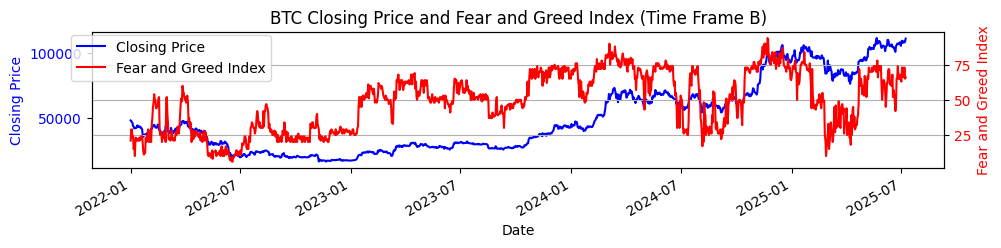

In [ ]:
import matplotlib.pyplot as plt

# Ensure the 'Date' column is in datetime format
matrixB['Date'] = pd.to_datetime(matrixB['Date'])

# Create the plot
fig, ax1 = plt.subplots(figsize=(11, 2)) # You can change the figure size here

# Plot Closing Price on the first y-axis
ax1.plot(matrixB['Date'], matrixB['closing_price'], color='blue', label='Closing Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Fear and Greed Index
ax2 = ax1.twinx()
ax2.plot(matrixB['Date'], matrixB['fear_greed_index'], color='red', label='Fear and Greed Index')
ax2.set_ylabel('Fear and Greed Index', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title and legend
plt.title('BTC Closing Price and Fear and Greed Index (Time Frame B)')
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Improve date tick readability
fig.autofmt_xdate()

plt.grid(True)
plt.show()